# Exercises for Particle Physics I
## Exercise 03 - EMCal in a nutshell

    D. Wong, November 2025

## Setup

It is very likely that you will need the following packages, so don't forget to import them!

In [22]:
import numpy as np
import uproot
import matplotlib.pyplot as plt

# This is a local module that will be necessary for the sections 2 and 3: it's already provided in this repository
import exercise3_utils as ex3

<a name='section_1_0'></a>
<hr style="height: 1px;">

## <h1 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Section 1: Electromagnetic cascades in a calorimeter</h1>


An **electromagnetic (EM) shower** is a cascade of particles, including photons, electrons, and positrons, forms when a high-energy electron or photon interacts with dense material and produces a chain of secondary particles. <br>
Photons convert into electron–positron pairs, and these charged particles in turn emit bremsstrahlung photons, repeating the process as the shower multiplies and spreads. <br>
The cascade continues until particle energies fall below a critical value, where ionization dominates and the shower dies out. <br>
In an electromagnetic calorimeter (EMCal), this process is harnessed to measure particle energies, where the deposited energy is converted into measurable signals (e.g., light). <br>
The total signal provides a precise estimate of the incident electron or photon’s energy and impact position, making EM calorimetry a key technique in modern high-energy physics experiments.


<!--
![EMShower](figures/shower.gif)
![EMShower](https://www.aanda.org/articles/aa/full/2003/43/aaINTEGRAL41/img17.gif)
-->

<div style="text-align: center;">
  <img src="figures/x0.png" width="50%">
  <figcaption style="margin-top: 6px; font-size: 90%;"> Development of an electromagnetic shower </figcaption>
</div>

Bremsstrahlung is the primary energy loss process for electrons/positrons above ( $\sim$ 10 )~MeV, while photons lose energy mainly through the production of electron–positron pairs.
High-energy photons, electrons, and positrons create a cascade of secondary particles—known as an “electromagnetic shower.”

The following quantities ($\textit{Thomson’s approximation}$) are defined:

- $\textbf{Radiation Length} ~X_0$: Average distance over which the electron energy reduces by 1/e:
    
    $$ X_0 \approx \frac{1}{4 \, \alpha \, n \, Z^2 \, r_e^2 \ln \left( \frac{287}{\sqrt{Z}} \right)} $$
  
    where $\alpha$ is the fine-structure constant, $n$ is the number density of the nucleus, $Z$ is the atomic number of the nucles, and $r_e$ is the classical electron radius.

- $\textbf{Critical Energy} ~E_c$: Energy at which ionization becomes the dominant energy loss:
    
    $$ E_c \approx \frac{800\text{MeV}}{Z} $$
  

- $\textbf{Molière Radius} ~R_M$: Represents the lateral spread of an electromagnetic shower, mainly due to multiple scattering:
    
    $$ R_M = \frac{21 \, \text{MeV}}{E_c}  X_0 \, (\text{g/cm}^2) $$
    
    Approximately 95% of the shower energy is contained within $2 R_M$ (transverse width).

- $\textbf{Maximum Particle Count Length} ~x_{\text{max}}$: The shower reaches the maximum particle count after $x_{\text{max}}$ radiation lengths, given by:
    
    $$ x_{\text{max}} = \frac{\ln(E / E_c)}{\ln 2} X_0 $$
  
    where $E$ is the initial energy, and $x_{\text{max}}$ is also called longitudinal depth.

<div style="text-align: center;">
  <img src="figures/e_eng_loss.png" width="50%">
  <figcaption style="margin-top: 6px; font-size: 90%;"> Electron energy loss as a function of the energy </figcaption>
</div>

<a name='section_1_1'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 1.1: EMCal dimension estimation</h3>

**Electromagnetic calorimeters (EMCal)** are designed to measure the energy of particles using high-Z materials to trap the shower. 

The electrons in the shower produce scintillation light, and the amount of light collected is proportional to the total energy of the incident particles. This makes EMCal ideal for precisely measuring the energy of electrons, positrons, and photons.

The CMS detector at the LHC uses lead tungstate (PbWO$_4$) as the EMCal material.

<img src="https://www.researchgate.net/profile/Rosalinde-Pots/publication/364997605/figure/fig3/AS:11431281094130646@1667393809224/Schematic-overview-of-the-Electromagnetic-Calorimeter-ECAL-of-CMS-Modified-from-32.jpg" 
alt="CMS ECAL"
width="600" 
style= "display:block; margin-left:auto; margin-right:auto">

<div class="alert alert-info">
<strong>Exercise:</strong> 
Calculate the radiation length and critical energy of Pb and PbWO$_4$. Then, compare your results with those available on the PDG website: <br>
- Pb: <a href="https://pdg.lbl.gov/2024/AtomicNuclearProperties/HTML/lead_Pb.html">link</a><br>
- PbWO4: <a href="https://pdg.lbl.gov/2024/AtomicNuclearProperties/HTML/lead_tungstate.html">link</a><br>
<br>

For PbWO$_4$, assume an effective atomic number Z = $\dfrac{Z_{Pb} + Z_W + 4 \times Z_O}{6}$ = $\dfrac{82 + 74 + 4 \times 8}{6}$ = 31.3 <br>
and an effective atomic weigth A = $\dfrac{A_{Pb} + A_W + 4 \times A_O}{6}$ = $\dfrac{207.2 + 183.8 + 4 \times 16}{6}$ = 75.8 <br>

<br>

Do your calculated values correspond to what you found in the PDG page?

</span>
</div>

In [23]:
# --> enter your code 

import numpy as np

def critical_energy(Z, const_factor = 610, offset_denominator = 1.24):
    return const_factor / (Z + offset_denominator)

def radiation_length(A, Z, const_factor_num = 716.4, const_factor_den = 287):
    return const_factor_num*A / (Z*(Z+1)*np.log(const_factor_den/np.sqrt(Z)))
    
Z_PbWO4 = 31.3
A_PbWO4 = 75.8

print(f'PbWO4 critical energy: {critical_energy(Z_PbWO4)} MeV')
print(f'PbWO4 alternative critical energy: {critical_energy(Z_PbWO4, 800, 1.2)} MeV')
print(f'PbWO4 radiation length: {radiation_length(A_PbWO4, Z_PbWO4)} g/cm2')

Z_Pb = 82
A_Pb = 207.2

print(f'Pb critical energy: {critical_energy(Z_Pb)} MeV')
print(f'Pb alternative critical energy: {critical_energy(Z_Pb, 800, 1.2)} MeV')
print(f'Pb radiation length: {radiation_length(A_Pb, Z_Pb)} g/cm2')

Z_PbWO4 = 68.35
A_PbWO4 = 75.8

E_c_PbWO4 = critical_energy(Z_PbWO4) # 610 / (Z_PbWO4 + 1.24)
print(f"The estimated critical energy for PbW04 is {E_c_PbWO4} MeV")

X_0_PbWO4 = radiation_length(A_PbWO4, Z_PbWO4) # 716.4 * A_PbWO4 / (Z_PbWO4 * (Z_PbWO4 + 1) * math.log(287 / math.sqrt(Z_PbWO4)))
print(f"The estimated radiation length for PbWO4 is {X_0_PbWO4} g/cm²")

PbWO4 critical energy: 18.746158574062694 MeV
PbWO4 alternative critical energy: 24.615384615384617 MeV
PbWO4 radiation length: 13.640750228036683 g/cm2
Pb critical energy: 7.328207592503604 MeV
Pb alternative critical energy: 9.615384615384615 MeV
Pb radiation length: 6.310506879854029 g/cm2
The estimated critical energy for PbW04 is 8.765627245293865 MeV
The estimated radiation length for PbWO4 is 3.2296751688933782 g/cm²


<div class="alert alert-success">

*--> (put your text here)*

The values we obtain for lead match those of the PDG, but it is not the case for lead tungstate.

This suggests that for composites, we cannot simply use a weighted mean of the properties of the individual elements.

The effective atomic number and Thomson's approximation cannot produce a good estimation for the radiation length and the critical energy.

Consult the PDG [website](https://pdg.lbl.gov/2024/AtomicNuclearProperties/) to get more precise values for both radiation length and critical energy for PbWO$_4$ (note that lead tungstate is an inorganic scintillator).

<div class="alert alert-info">
<strong>Exercise:</strong> 
Estimate the approximate dimension of an electromagnetic shower in a PbWO$_4$ crystal (longitudinal depth and transverse width) for a 100 GeV electron.
</span>
</div>

In [24]:
# --> enter your code 

# Photon energy
E = 100000

# PbWO4 properties
X_0 = 0.92 # cm
E_c = 9.64 # MeV

def moliere_radius(critic_energy, radiation_length, moliere_constant = 21):
    return moliere_constant * radiation_length / critic_energy

print(f'The Moliere radius of a shower generated by a {E/1000} GeV electron is {moliere_radius(E_c, X_0)} cm')
print(f'The width of a shower generated by a {E/1000} GeV electron is {2*moliere_radius(E_c, X_0)} cm')

def radiation_lengths(photon_energy, critic_energy):
    return np.log(photon_energy/critic_energy)    

def shower_length(photon_energy, critic_energy, radiation_length):
    number_of_radiation_lengths = radiation_lengths(photon_energy, critic_energy)
    total_length = number_of_radiation_lengths * radiation_length
    return total_length

print(f'The length of a shower generated by a {E/1000} GeV electron is {radiation_lengths(E,E_c)} radiation lengths, corresponding to {shower_length(E,E_c,X_0)} cm')

The Moliere radius of a shower generated by a 100.0 GeV electron is 2.004149377593361 cm
The width of a shower generated by a 100.0 GeV electron is 4.008298755186722 cm
The length of a shower generated by a 100.0 GeV electron is 9.247004356347773 radiation lengths, corresponding to 8.507244007839951 cm


<div class="alert alert-info">
<strong>Exercise:</strong> 
Is this a good estimation for the size an EMCal should have? The CMS EMCal crystals are actually 25 $X_0$ long: why?</span>
</div>

<div class="alert alert-success">

*--> (put your text here)*

We want to have a calorimeter deep enough so that the entire electromagnetic shower is contained in the crystal, without any energy escaping the back of the calorimeter. A photon of 100 GeV is already quite energetic, and it is contained in just 9-10 radiation lengths. The length increases logaritmically with the energy, which means that 25 $X_0$ provides a safe margin against energy leaks.

<a name='section_1_2'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 1.2: Shape of muon clusters on EMCal</h3>

For muons with energies of the order of 100 GeV, the ionization is the dominant energy-loss process. <br>
Muons travel significant distances in dense materials: for example, a 10 GeV muon loses about 10 MeV/cm in iron and has a range of several meters.

<div style="text-align: center;">
  <img src="figures/mu_eng_loss.png" width="50%">
</div>

A particle with a momentum close to the minimum ionization point is called a minimum ionizing particle (MIP). <br>
A particle with a much larger momentum but with an energy loss comparable to that of the minimum ionization point is also called a MIP.

For bremsstrahlung process, the energy loss through distance is given by:

$-\dfrac{dE}{dx} \propto \dfrac{Z^2 E}{m_{particle}^2}$.

<div class="alert alert-info">
<strong>Exercise:</strong> 
Consider a muon with a momentum of 50 GeV passing through the CMS EMCal, which has a depth of approximately 22 cm. What is the shape of the shower you expect? How do you expect the energy deposit to be distributed?</span>
</div>

<div class="alert alert-success">

*--> (put your text here)*

Using the bremsstrahlung energy loss formula:

$-\dfrac{dE}{dx} \propto \dfrac{Z^2 E}{m_{particle}^2} = \left( -\dfrac{dE}{dx} \right)_{electron} \left( \dfrac{m^2_{electron}}{m_{muon}^2} \right)$

This means that we expect an energy deposit about 40 thousand times smaller than that of an electron:
- A 50 GeV muon is still a minimum ionizing particle (MIP).
- We expect a narrow EM shower with very little energy deposit (narrow peak near 0 GeV).

<div class="alert alert-info">
<strong>Exercise:</strong> 
Knowing at what energy electrons and positrons start emitting significant bremsstrahlung, determine the threshold energy for a muon to emit significant bremsstrahlung in a PbWO$_4$ EMCal. 
In other words, what energy must a muon possess to deposit an amount of energy equal to the critical energy?
</span>
</div>

In [25]:
# --> enter your code 

# The energy at which electrons and positrons start emitting significant energy via bremsstrahlung is the critical energy.
# Let's consider PbWO4: we already got from PDG that the critical energy for an electron is 9.64 MeV.

# Critical energy
E_c = 9.64 # MeV

# Electron and muon masses and their ratios
electron_mass = 0.511 # MeV
muon_mass     = 105   # MeV

ratio2 = (muon_mass / electron_mass)**2

# Energy a muon must possess to deposit an energy equal to E_c via bremsstrahlung
E_c_muon = ratio2 * E_c  # MeV

print(f'The critical energy for a muon in PbWO4 is {E_c_muon / 1000} GeV')

The critical energy for a muon in PbWO4 is 407.0182022893601 GeV


<a name='section_1_3'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 1.3: Detector proposal</h3>

<div class="alert alert-info">
<strong>Exercise:</strong> 
How would you implement an experimental apparatus involving an EMCal so that it can distinguish electrons from photons and muons?</span>
</div>

<div class="alert alert-success">

*--> (put your text here)*

The commonly used approach is to put a tracker before the EMCal, and embedding the appratus in a magnetic field.

The tracker is used to measure the momentum of charged particles by recording their trajectories, and exploiting the bending Lorentz force in a magnetic field.

Since muons are MIPs, they deposit only a minimal amount of energy in the calorimeter: they don't form EM showers, and the momentum measured using the tracker is not compatible with the energy measured in the EMCal.

On the other hand, we expect to measure all of an electron's energy in the EMCal, meaning that we expect a nice shower and an energy measurement compatible with the momentum measured by the tracker.

Photons instead do not interact with the tracker, as they are neutral particles, and even if interactions occur, the trajectory is straight.


<a name='section_2_0'></a>
<hr style="height: 1px;">


## <h1 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Section 2: Calorimetry and reconstruction</h1>


In this section, we will consider a real EMCal, used in the [PHENIX](https://www.phenix.bnl.gov/) experiment at Brookhaven National Laboratory.

We have prepared ROOT n-tuples containing hit information from the EMCal, using a particle gun with a gaussian energy distribution, ranging from 5 GeV to 80 GeV.

The EMCal at the PHENIX experiment covers an area of $2~m~\times~4~m$ perpendicular to the beamline. 

This corresponds to 3 × 6 EMCal super modules where:
- 1 EMCal super module = 6 × 6 = 36 EMCal modules.
- 1 EMCal module is 11 cm × 11 cm and contains 2 × 2 = 4 towers/channels, with a granularity of approximately 5.5 cm.

In total, there are 2592 towers or channels to read out the energy deposits from the EMCal.

For practical purposes, consider the PHENIX EMCal as a 2D matrix of 2592 channels (72 horizontal x 36 vertical), where each channel has a dimension of (5.535cm x 5.535cm x 36.96cm).

<div style="text-align: center;">
  <img src="figures/PHENIX_color_view.gif" width="50%">
  <figcaption style="margin-top: 6px; font-size: 90%;"> Schematic view of the PHENIX detector. </figcaption>
</div>

We provide rootfiles containing the readout for electron and dielectron events from the EMCal.

The readout has the following format:
```
'elmID': array([1207, 1208, 1243, 1244, 1245, 1246, 1279, 1280, 1281, 1282,
       1283, 1314, 1315, 1316, 1317, 1318, 1352, 1387, 1388, 1389, 1390],
       dtype=int32), 
'edep': array([2.1672759e-03, 2.3865167e-03, 6.9637364e-03, 6.5519638e-02,
       5.9960117e-03, 1.5223619e-03, 1.5519783e-02, 1.3763729e+00,
       1.7959915e-02, 1.1316873e-03, 2.6412117e-03, 1.1183993e-03,
       3.0373151e-03, 1.8506199e-02, 5.9680296e-03, 1.2358509e-03,
       1.5430434e-03, 1.2675102e-03, 8.8297541e-04, 8.7783835e-04,
       1.5175857e-03],
       dtype=float32)
```

where `elmID[X]` is the identifier ($\textit{element ID}$) of the channel that measured a given $\textit{energy deposit}$ `edep[X]`.

The values of `elmID[X]` vary from 0 to 2591 (corresponding to the total number of channels).

To conveniently read the rootfiles, we provide the `exercise3_utils.py` module.

Use the following code snippet to read one event from the EMCal simulation:

```
# Example to obtain EMCal hits
elmID, edep = ex3.get_hit_data()
edep = edep/ex3.sfc  # This converts the energy depositions into GeV
```

When using `elmID, edep = ex3.get_hit_data()`, you will be asked to select which set of simulated events you want to use.
We are providing one `electron.root` and one `dieletron.root` samples: digit `electron` or `dieletron` depending on what sample you want to access.

In the rest of the exercise, whenever you are asked to work with the simulated events from the PHENIX EMCal, please remember to always convert the energy depositions as above using `ex3.sfc`!

<a name='section_2_1'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 2.1: Events visualization and distribution</h3>

The `elmID` is the index of the channel that received an hit and `edep` is the energy deposition measured for a hit in the given channel. 
To reconstruct the energy of the particle, you need to convert `elmID` into 2D spatial coordinates. 
Since each electron may deposit part of its energy in different neighboring cells, we typically want to assign to the electron the energy of the cell with maximum energy deposit plus the energy of the closest cells.

Also, the energy deposited in the EMCal should be divided by a sampling fraction constant (`ex3.sfc`).

<div class="alert alert-info">
<strong>Exercise:</strong> 
Write an algorithm that converts the channel ID into a pair of X and Y coordinates (in cm) according to the geometry of the PHENIX EMCal.</span>
</div>

In [70]:
def map_channels_energies_to_matrix(channels, energies, n_rows=72, n_columns=36):
    '''
    This function is not ment to map into spatial coordinates,
    but it is useful to cross-check the results.
    '''
    shape = (n_rows, n_columns)
    matrix = np.zeros(shape, dtype=float)
    i_rows, i_columns = np.unravel_index(channels, shape)
    matrix[i_rows, i_columns] = energies
    return matrix.T


def channel_to_spatial_coordinates(channels, n_rows=72, n_columns=36, channel_size=5.535):
    shape = (n_rows, n_columns)
    i_rows, i_columns = np.unravel_index(channels, shape)
    x = (i_rows - n_rows / 2) * channel_size
    y = (n_columns / 2 - i_columns) * channel_size
    return np.column_stack((x, y))

<div class="alert alert-info">
<strong>Exercise:</strong> 
Plot the 2D distribution of all hits in an event according to their X and Y coordinates and their energy deposition. For example, show event 5 from the electron sample.</span>
</div>

In [27]:
def plot_simple_energy_matrix(matrix, title="EMCal clusters", color_map="viridis"):
    import matplotlib  # noqa
    masked_matrix = np.ma.masked_where(matrix == 0, matrix)
    cmap = matplotlib.colormaps.get_cmap(color_map)
    cmap.set_bad(color='white')
    plt.figure(figsize=(10, 10))
    plt.imshow(masked_matrix, cmap=cmap, aspect='auto')
    plt.colorbar(label="Energy deposition (GeV)")
    plt.title(title)
    plt.xlabel("X coordinate (arbitrary units)")
    plt.ylabel("Y coordinate (arbitrary units)")
    plt.show()


def plot_spatial_energy_matrix(coordinates, energies, centroids=None, labels=None, title="EMCal clusters", marker_size_scale=20, color_map="viridis"):
    x, y = coordinates[:, 0], coordinates[:, 1]
    plt.figure(figsize=(10, 10))
    
    scatter = plt.scatter(
        x, y,
        c=energies,
        s=energies * marker_size_scale,
        cmap=color_map,
        edgecolor="k",
        alpha=0.8
    )
    
    plt.colorbar(scatter, label="Energy deposition (GeV)")
    plt.title(title)
    plt.xlabel("X coordinate (cm)")
    plt.ylabel("Y coordinate (cm)")
    plt.xlim(-210, 210)
    plt.ylim(-105, 105)
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.show()

Enter sample type (electron or dielectron):  electron
Enter event number (0-9):  5


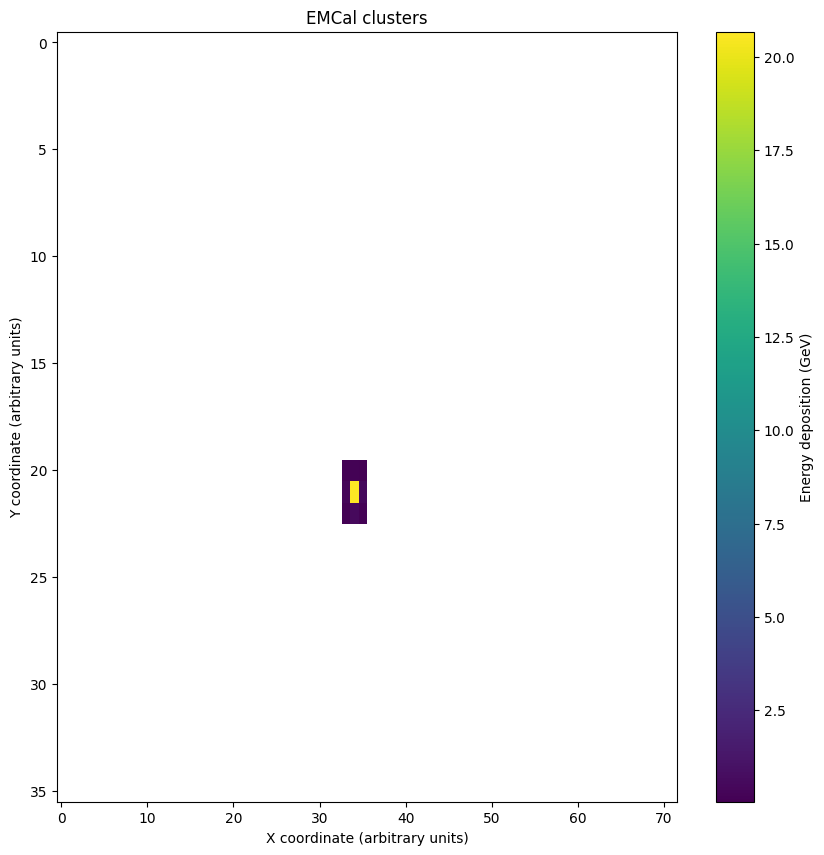

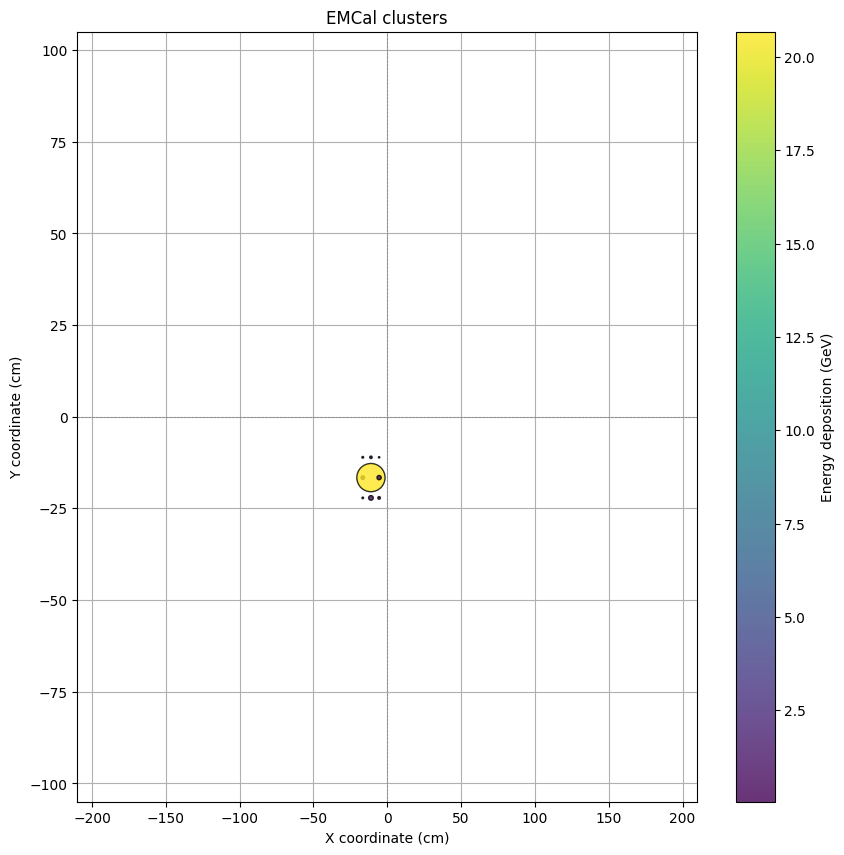

In [29]:
import exercise3_utils as ex3

elmID, edep = ex3.get_hit_data()
edep = edep/ex3.sfc

# Plot without the conversion into spatial coordinates
mapped_matrix = map_channels_energies_to_matrix(elmID, edep)
plot_simple_energy_matrix(mapped_matrix)

# Plot with the conversion into spatial coordinates
coordinates = channel_to_spatial_coordinates(elmID)
plot_spatial_energy_matrix(coordinates, edep)

<div class="alert alert-info">
<strong>Exercise:</strong> <br>
- What is the measured energy of the particle in event 5 of the electron sample?  <br>
- And what is the distribution of all measured energies in all events of the electron sample?  <br>
  <strong> Hint </strong>: check 'exercise3_utils.py' to understand how to conveinently access events without the need of keyboard inputs.
</span>
</div>

In [30]:
# The total energy for event 5 is rather trivial:
total_energy = np.sum(edep)
print(f'The total energy is {total_energy} GeV')

The total energy is 22.5846004486084 GeV


In [31]:
# Explicitly print the elmID and edep arrays in event 5
display(ex3.process_event('electron',5))

{'elmID': array([1208, 1209, 1210, 1244, 1245, 1246, 1280, 1281, 1282], dtype=int32),
 'edep': array([0.00866213, 0.0361117 , 0.00770643, 0.01786287, 2.2746735 ,
        0.06199514, 0.0056064 , 0.05205104, 0.0196369 ], dtype=float32)}

In [32]:
# Now loop over all events
events_energy = []

for i in range(10):
    # We prefer to use process_event to read the entry without the need of keyboard inputs
    event   = ex3.process_event('electron',i)
    elmID_i = event['elmID']
    edep_i  = event['edep']
    edep_i  = edep_i/ex3.sfc
    events_energy.append(np.sum(edep_i))

print(events_energy)

[6.9132013, 40.34909, 43.68286, 34.880325, 71.95289, 22.5846, 33.721992, 77.41717, 13.752785, 37.862812]


<a name='section_2_2'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 2.2: Cluster properties and moments</h3>

After having measured the energy deposited by all the hits in a cluster, it is important to characterize the cluster and determine its properties. We will use the moments of a distribution to do this. 

The moments of a distribution provide useful information about its shape and spread. Below are the formulas for different moments:
- $\textbf{1st order (raw)}$:
    $$
    \text{Mean: } \mu := \mathbb{E}[X] = \frac{\mu_1}{1}
    $$
- $\textbf{2nd order (central)}$:
    $$
    \text{Variance: } \sigma^2 = \mathbb{E}[(X - \mu)^2] = \frac{\mu_2}{1^2} = \mu_2
    $$
- $\textbf{3rd order (standardized)}$:
    $$
    \text{Skewness: }\gamma = \mathbb{E} \left[ \left( \frac{X - \mu}{\sigma} \right)^3 \right] = \frac{\mathbb{E}[(X - \mu)^3]}{(\mathbb{E}[(X - \mu)^2])^{3/2}}
    $$
- $\textbf{4th order (standardized)}$:
    $$
    \text{Kurtosis: } g = \mathbb{E} \left[ \left( \frac{X - \mu}{\sigma} \right)^4 \right] = \frac{\mathbb{E}[(X - \mu)^4]}{(\mathbb{E}[(X - \mu)^2])^2}
    $$

They are helpful to analyze the 2D distribution of the EMCal hits.

<div class="alert alert-info">
<strong>Exercise:</strong> 
Using $\textit{numpy}$, implement functions to calculate the mean (geometric center), width ($\sigma$), standardized skewness and standardized kurtosis for the PHENIX EMCal clusters.</span>
</div>

In [33]:
# --> enter your code to complete the following functions

def f_mean(data):
    return np.mean(data)


def f_width(data):
    return np.std(data, ddof=0)


def f_variance(data):
    return width(data)**2


def f_skewness(data):
    n        = len(data)
    mean     = f_mean(data)
    width    = f_width(data)
    skewness = np.sum((data - mean) ** 3) / (n * (width ** 3))
    return skewness


def f_kurtosis(data):
    n        = len(data)
    mean     = f_mean(data)
    width    = f_width(data)
    kurtosis = np.sum((data - mean) ** 4) / (n * (width ** 4))
    return kurtosis

<div class="alert alert-info">
<strong>Exercise:</strong> 
Visualize again some events from the electron sample and calculate the moments. Which moments look useful for identifying electrons, and why?</span>
</div>

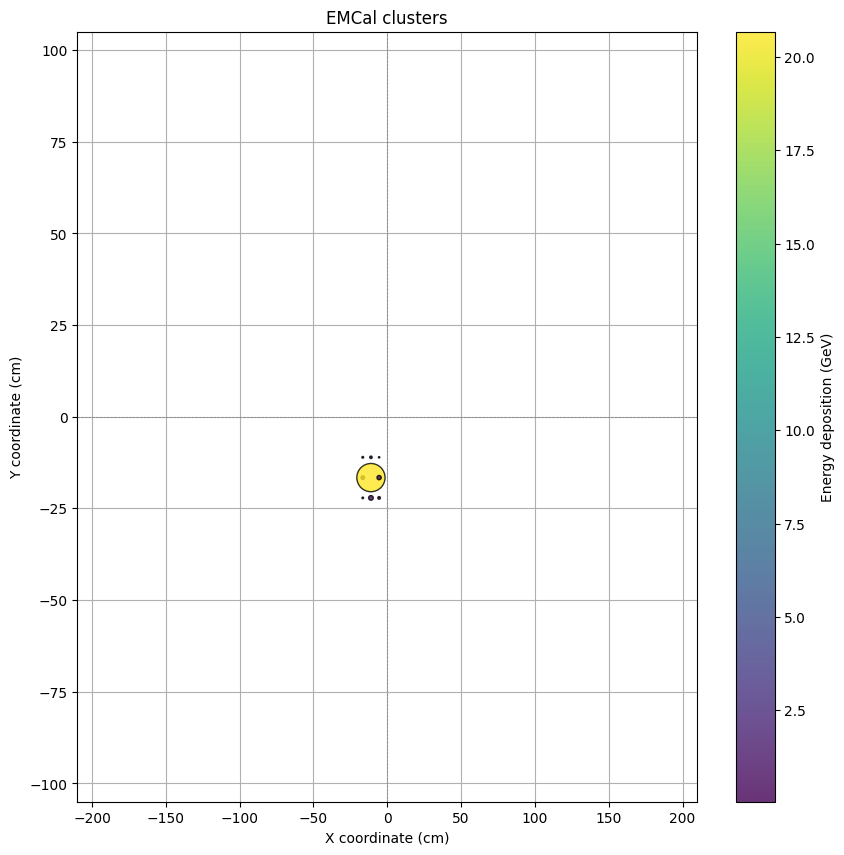

[-16.605 -16.605 -16.605 -11.07  -11.07  -11.07   -5.535  -5.535  -5.535] [-11.07  -16.605 -22.14  -11.07  -16.605 -22.14  -11.07  -16.605 -22.14 ]
Mean: -11.07,-16.605
Width: 4.519308575434963,4.519308575434963
Skewness: 0.0,0.0
Kurtosis: 1.5000000000000007,1.5000000000000007


In [34]:
x = coordinates[:, 0]
y = coordinates[:, 1]

plot_spatial_energy_matrix(coordinates, edep)


print(x, y)

x_mean = f_mean(x)
y_mean = f_mean(y)
print(f'Mean: {x_mean},{y_mean}')

x_width = f_width(x)
y_width = f_width(y)
print(f'Width: {x_width},{y_width}')

x_skewness = f_skewness(x)
y_skewness = f_skewness(y)
print(f'Skewness: {x_skewness},{y_skewness}')

x_kurtosis = f_kurtosis(x)
y_kurtosis = f_kurtosis(y)
print(f'Kurtosis: {x_kurtosis},{y_kurtosis}')

<div class="alert alert-success">

*--> (put your text here)*

- Mean: it indicates the average position of the deposit --> not especially useful.
- Width: it indicates the spread of the deposit --> it gives hints on the shower transversal development. For electrons and photons, we expect compact showers, compared for example with hadrons.
- Skewness: it indicates the asymmetry of the deposit --> if the experimental apparatus is embedded in a magnetic field, we expect the bremsstrahlung photons to be emitted tangentially compared to the curved trajectory of the electron. For a photon, we expect instead a symmetric deposit.
- Kurtosis: it indicates how much peaked the distribution is --> hadrons tend to produce broader showers, with larger deposits in the tails.

<div class="alert alert-info">
<strong>Exercise:</strong> 
Standardization means rescaling data so that it has a mean of 0 and a standard deviation of 1.<br><br>
Implement functions to calculate skewness and kurtosis without "standardization" and compute them for a few events. Why do we usually use the standardized versions?
</div>

In [35]:
# --> enter your code to complete the following functions

def f_skewness_raw(data):
    n = len(data)
    mean = f_mean(data)
    width = f_width(data)
    skewness = np.sum((data - mean) ** 3) / n
    return skewness


def f_kurtosis_raw(data):
    n = len(data)
    mean = f_mean(data)
    width = f_width(data)
    kurtosis = np.sum((data - mean) ** 4) / n
    return kurtosis


# Skewness
print(f'Skewness: {x_skewness},{y_skewness}')

x_skewness_raw = f_skewness_raw(x)
y_skewness_raw = f_skewness_raw(y)
print(f'Raw skewness: {x_skewness},{y_skewness}')

# Kurtosis
print(f'Kurtosis: {x_kurtosis},{y_kurtosis}')

x_kurtosis_raw = f_kurtosis_raw(x)
y_kurtosis_raw = f_kurtosis_raw(y)
print(f'Raw kurtosis: {x_kurtosis_raw},{y_kurtosis_raw}')

Skewness: 0.0,0.0
Raw skewness: 0.0,0.0
Kurtosis: 1.5000000000000007,1.5000000000000007
Raw kurtosis: 625.7188548337501,625.7188548337501


<div class="alert alert-success">

*--> (put your text here)*

Comment your results:

Since skewness and kurtosis basically compares the behaviour of a distribution w.r.t. a gaussian distribution,
the standardized values provide useful numbers to interpret. 

If one looks at the "raw" kurtosis above: what 625 means? While 1.5 is easy to interpret.

<a name='section_3_0'></a>
<hr style="height: 1px;">


## <h1 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Section 3: Calorimetry and clustering</h1>

Due to the complex patterns of particle interactions, EMCal readouts can become dense and chaotic.
In these situations, clustering algorithms are essential to group hits that originate from a single particle, 
helping to reconstruct particle flows or analyze jets.

The $K$-means algorithm is a popular unsupervised machine learning technique used to partition data into $K$ distinct clusters based on feature similarity. 

- $\textbf{Initialize centroids}$: Randomly select $K$ hits; these hits will be the starting, $K$, centroids

- $\textbf{Assign clusters}$: Assign hits to the nearest centroid, forming $K$ clusters

- $\textbf{Update centroids and reassign hits}$: Calculate the centroid (mean of the coordinates) of each cluster; check if a hit in a cluster is closer to another centroid; if so, reallocate the hits to the closest cluster.

- $\textbf{Iterate}$: Repeat step 3 until no more hits change cluster (or until a certain tolerance).

- $\textbf{Output}$: The final centroids represent the centers of the $K$ clusters, and each hit is assigned to the cluster of its nearest centroid.

<a name='section_3_1'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 3.1: A homemade K-means clustering algorithm</h3>

<div class="alert alert-info">
<strong>Exercise:</strong> 
Visualize the event 0 from the electron sample and the event 6 from the dielectron sample and then compute the relevant moments. Do they still provide a good description for multi-particle cases? Why?</span>
</div>

Enter sample type (electron or dielectron):  electron
Enter event number (0-9):  5


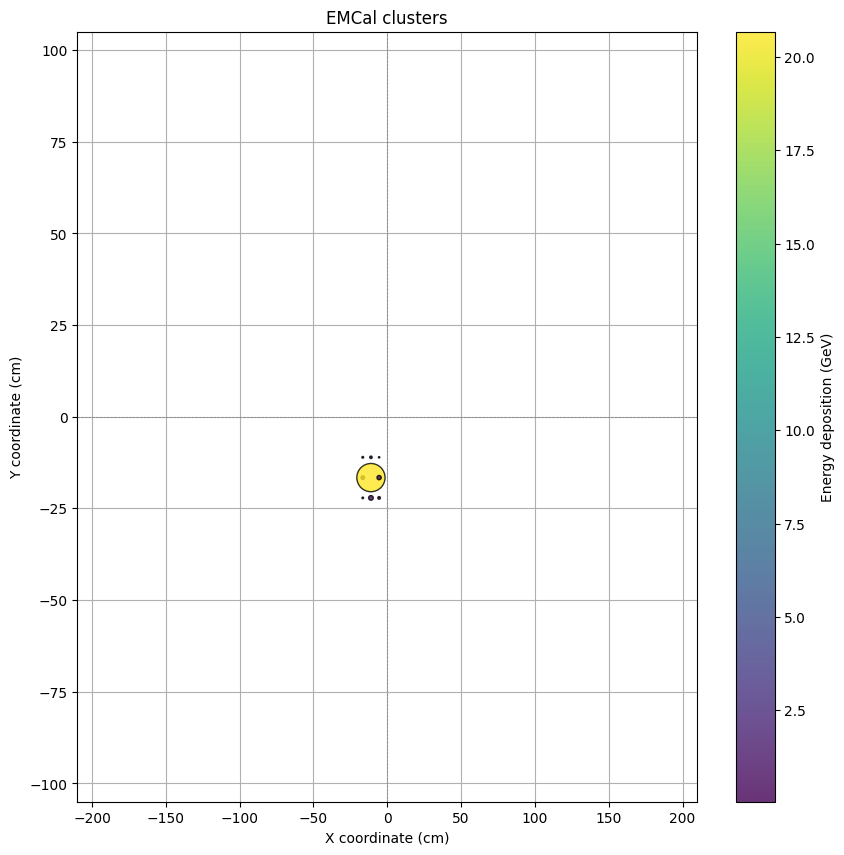

[-16.605 -16.605 -16.605 -11.07  -11.07  -11.07   -5.535  -5.535  -5.535] [-11.07  -16.605 -22.14  -11.07  -16.605 -22.14  -11.07  -16.605 -22.14 ]
Mean: -11.07,-16.605
Width: 4.519308575434963,4.519308575434963
Skewness: 0.0,0.0
Kurtosis: 1.5000000000000007,1.5000000000000007


Enter sample type (electron or dielectron):  dielectron
Enter event number (0-9):  3


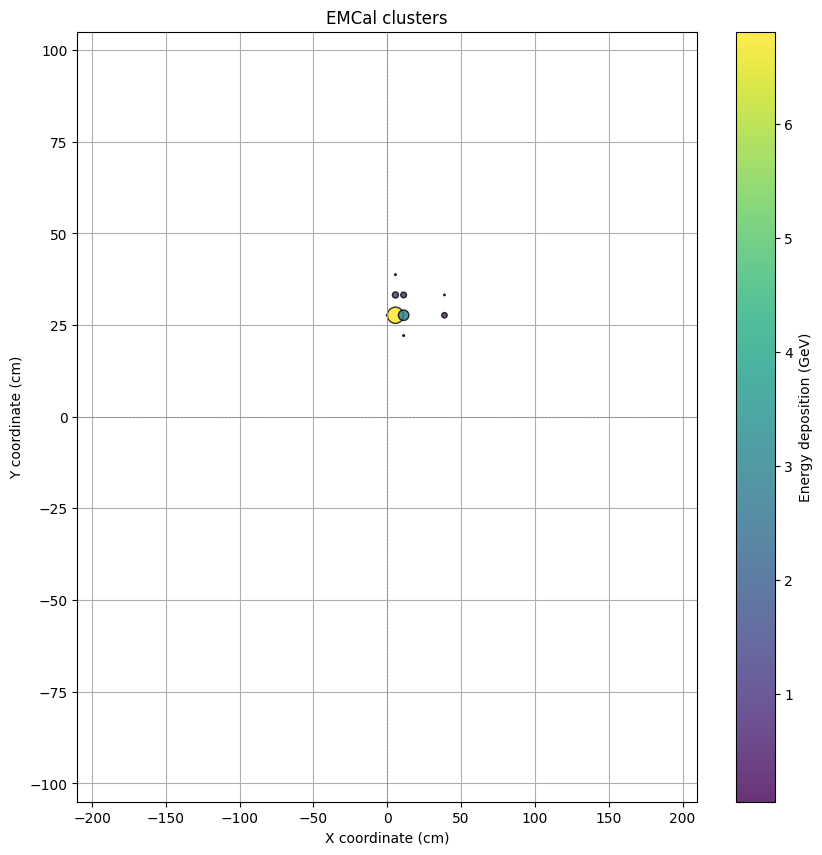

[ 0.     5.535  5.535  5.535 11.07  11.07  11.07  38.745 38.745] [27.675 38.745 33.21  27.675 33.21  27.675 22.14  33.21  27.675]
Mean: 14.145000000000003,30.135000000000005
Width: 13.585794051140333,4.602238585731949
Skewness: 1.105166883555907,0.1765833205492783
Kurtosis: 2.574056033324374,2.4757653061224487


In [36]:
# Event 0, electron
elmID, edep = ex3.get_hit_data()
edep = edep/ex3.sfc

coordinates = channel_to_spatial_coordinates(elmID)

x = coordinates[:, 0]
y = coordinates[:, 1]

plot_spatial_energy_matrix(coordinates, edep)

print(x, y)
x_mean = f_mean(x)
y_mean = f_mean(y)
print(f'Mean: {x_mean},{y_mean}')
x_width = f_width(x)
y_width = f_width(y)
print(f'Width: {x_width},{y_width}')
x_skewness = f_skewness(x)
y_skewness = f_skewness(y)
print(f'Skewness: {x_skewness},{y_skewness}')
x_kurtosis = f_kurtosis(x)
y_kurtosis = f_kurtosis(y)
print(f'Kurtosis: {x_kurtosis},{y_kurtosis}')

# Event 6, dielectron
elmID, edep = ex3.get_hit_data()
edep = edep/ex3.sfc

coordinates = channel_to_spatial_coordinates(elmID)

x = coordinates[:, 0]
y = coordinates[:, 1]

plot_spatial_energy_matrix(coordinates, edep)

print(x, y)
x_mean = f_mean(x)
y_mean = f_mean(y)
print(f'Mean: {x_mean},{y_mean}')
x_width = f_width(x)
y_width = f_width(y)
print(f'Width: {x_width},{y_width}')
x_skewness = f_skewness(x)
y_skewness = f_skewness(y)
print(f'Skewness: {x_skewness},{y_skewness}')
x_kurtosis = f_kurtosis(x)
y_kurtosis = f_kurtosis(y)
print(f'Kurtosis: {x_kurtosis},{y_kurtosis}')

<div class="alert alert-success">

*--> (put your text here)*

Comment your results:

All the momenta we considered apply to distributions relative to a single cluster. If we have two or more, they become meaningless.

For cases with particle gun decays, we can perform clustering to group the hits associated with different secondary particles produced in the decay.

To test the clustering algorithms and evaluate if they are implemented correctly, you can use the following method to randomly generate a number of clusters with a given number of hits.

```
import ex3
points = ex3.generate_2d_points()
# ex3.generate_2d_points(num_clusters=X, points_per_cluster=Y, spread=Z, random_seed=42)
```

<div class="alert alert-info">
<strong>Exercise:</strong> 
Generate some points with the default settings (without passing arguments) and also with some custom settings and visualize the generated datasets.</span>
</div>

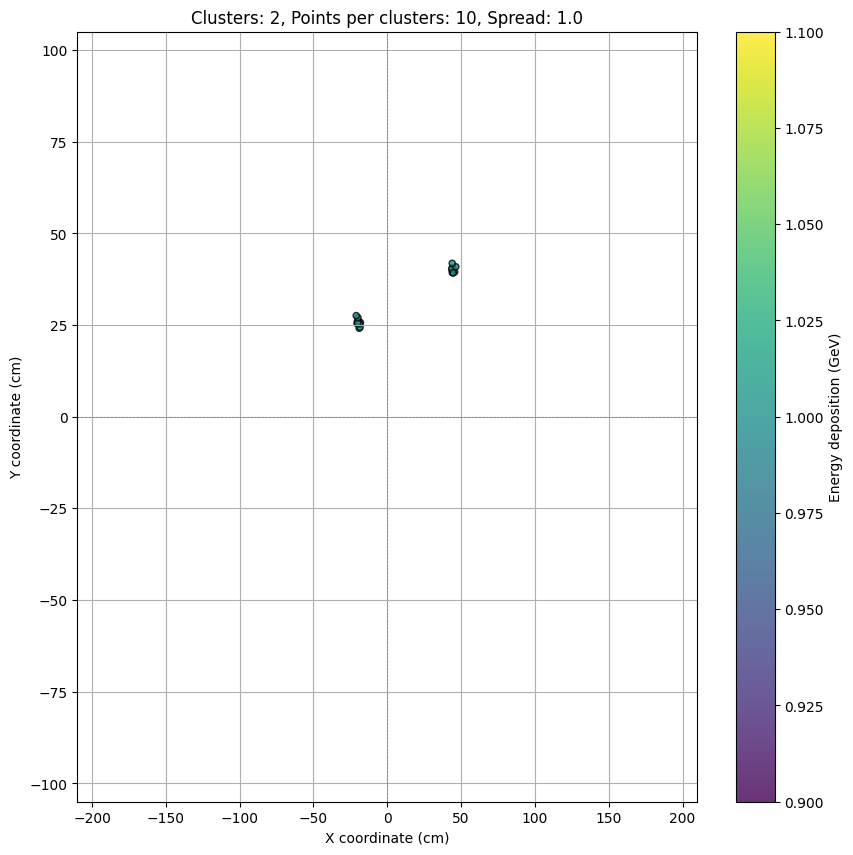

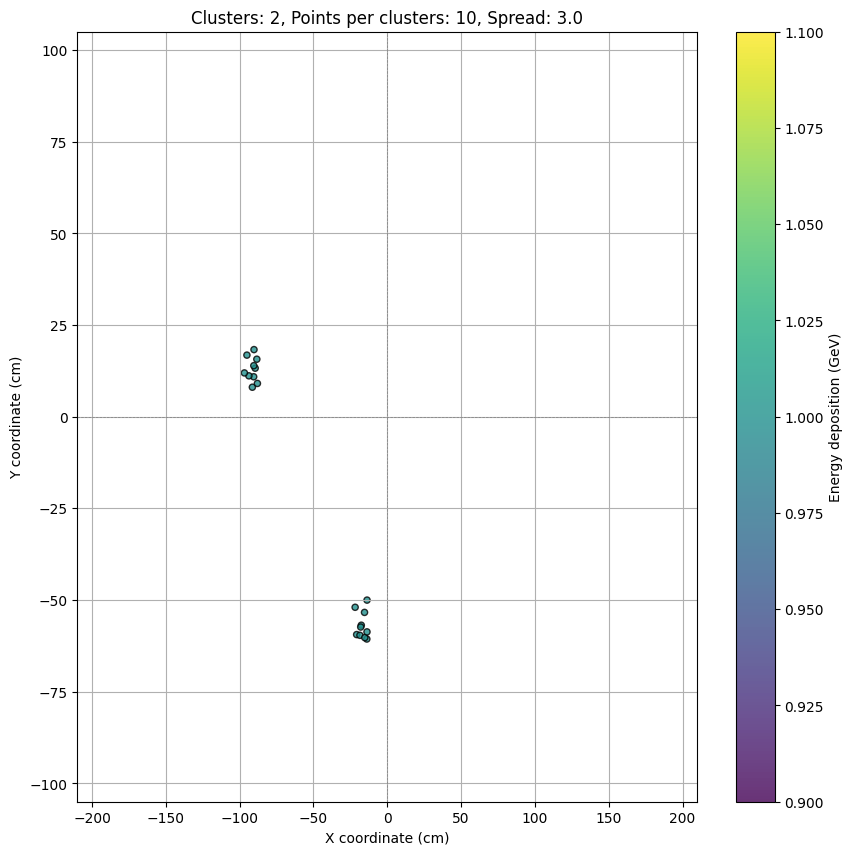

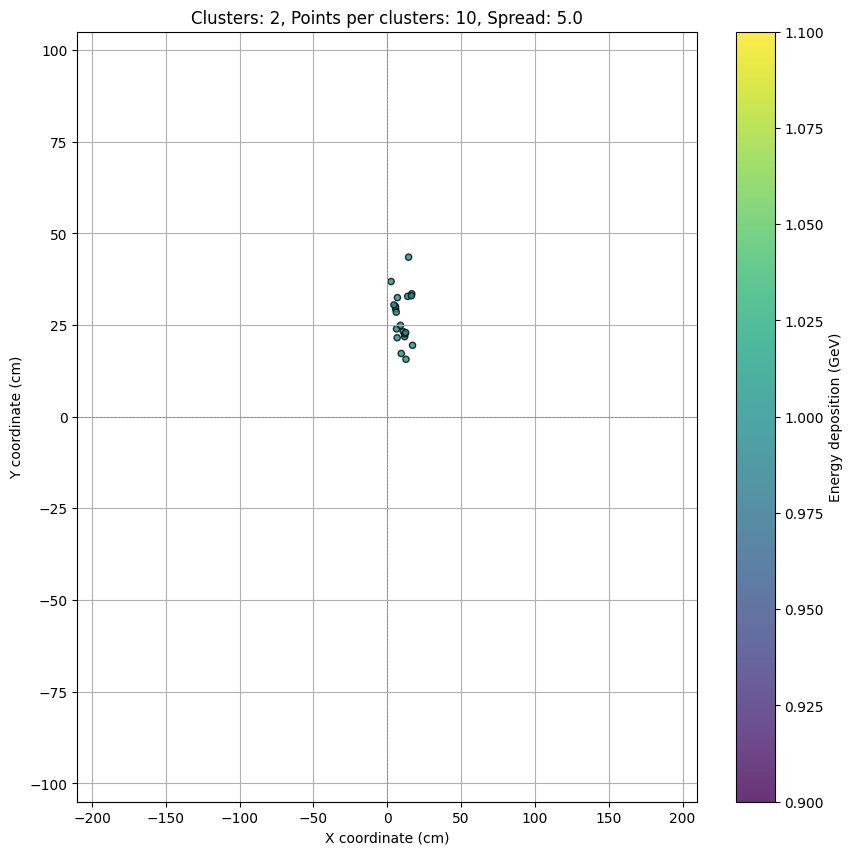

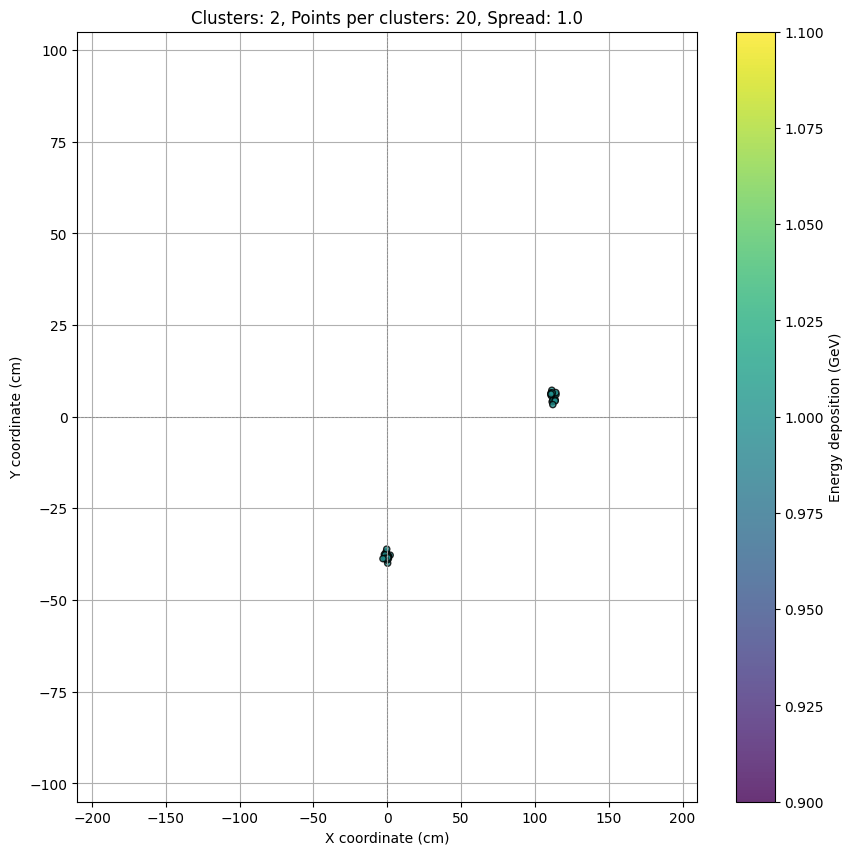

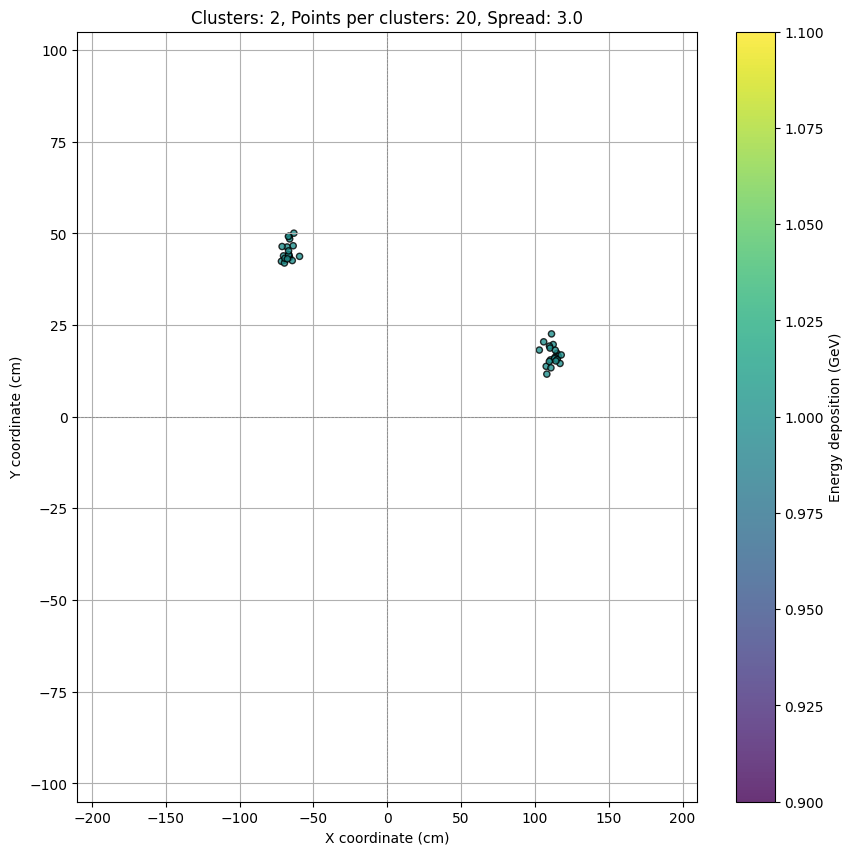

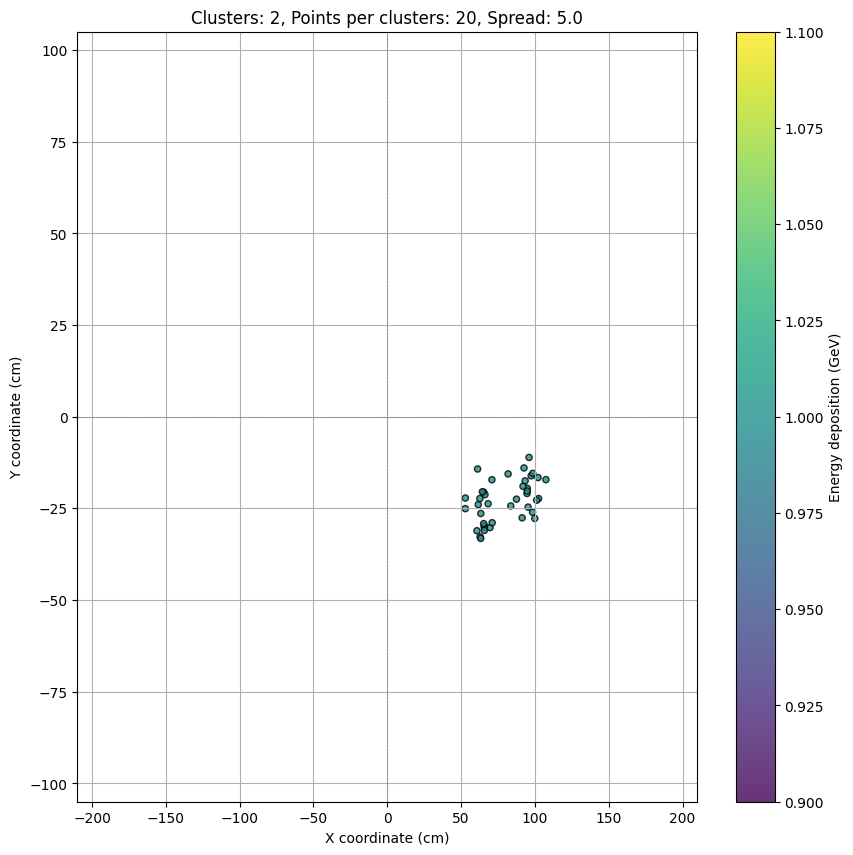

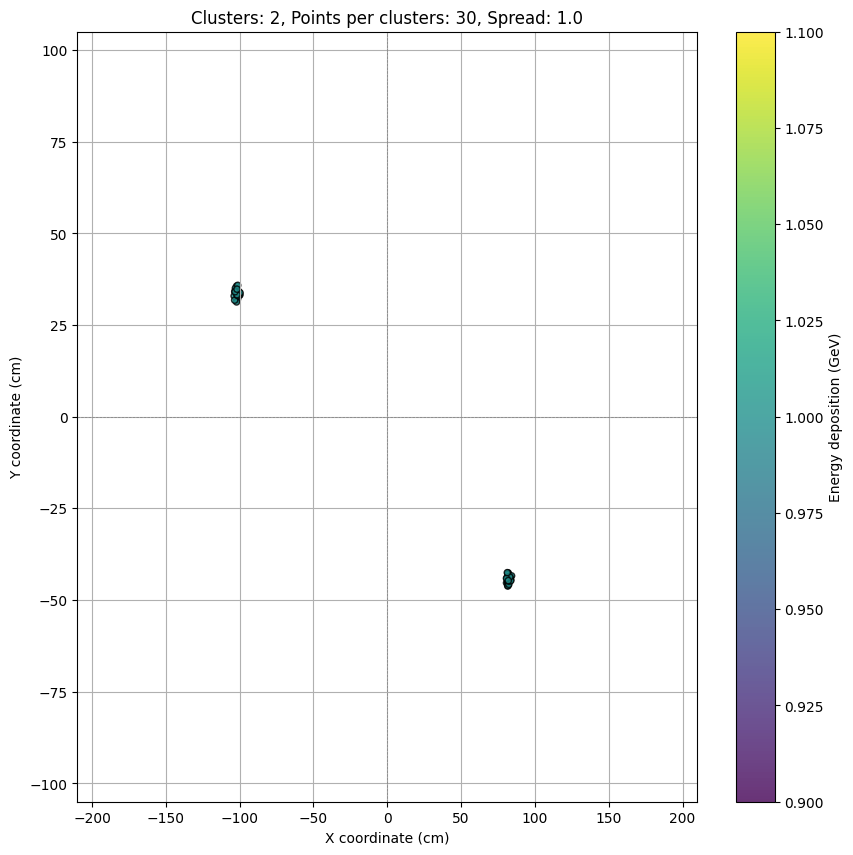

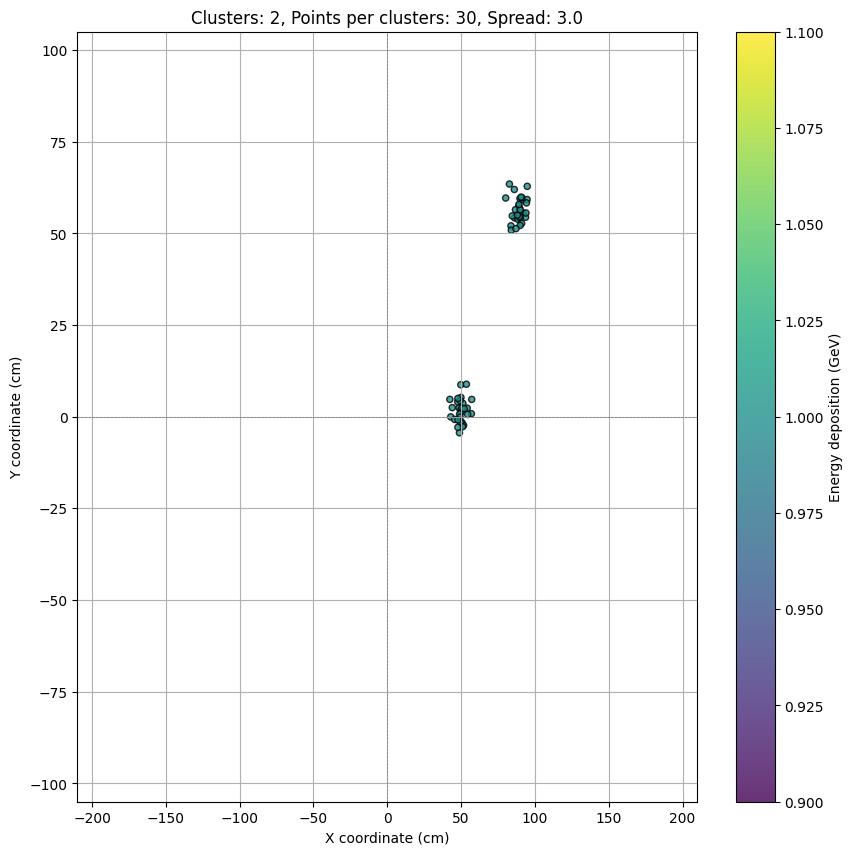

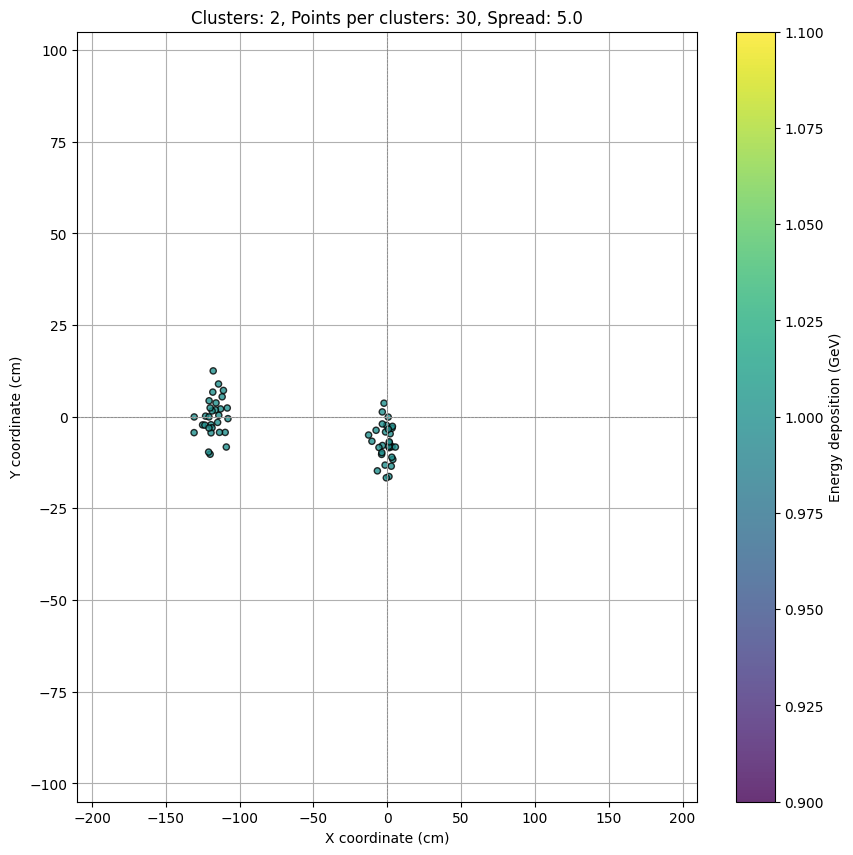

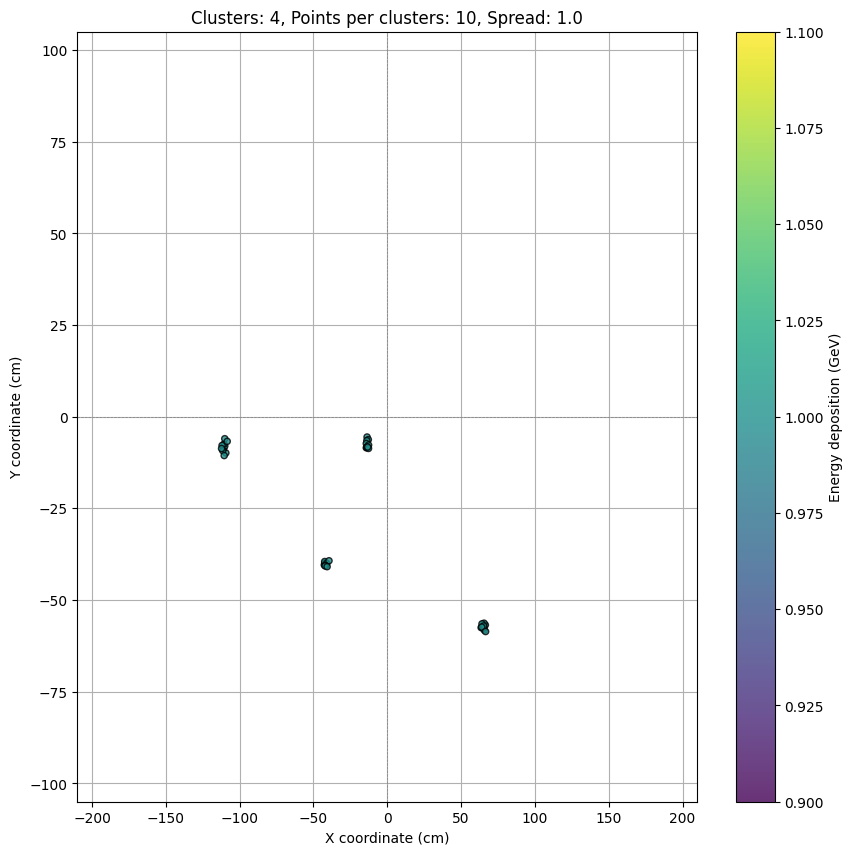

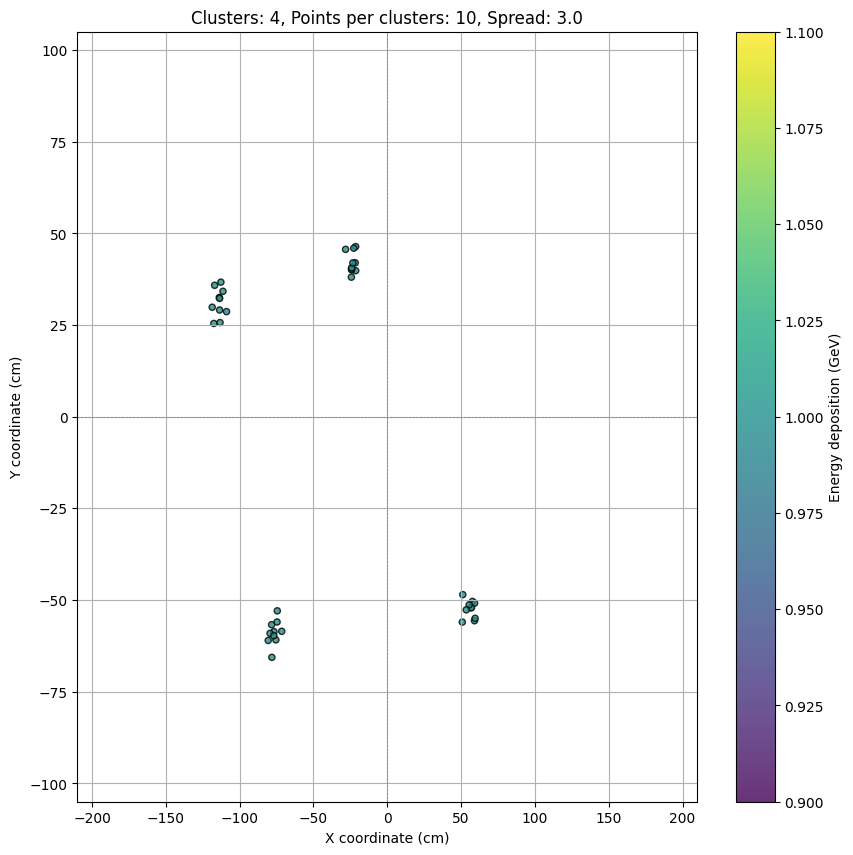

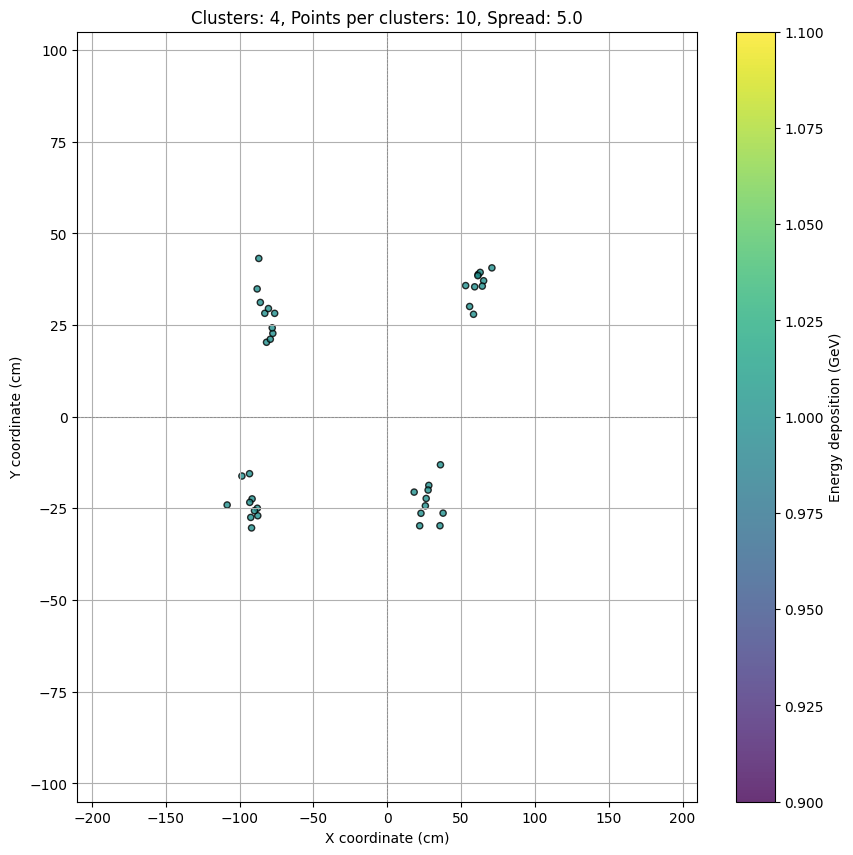

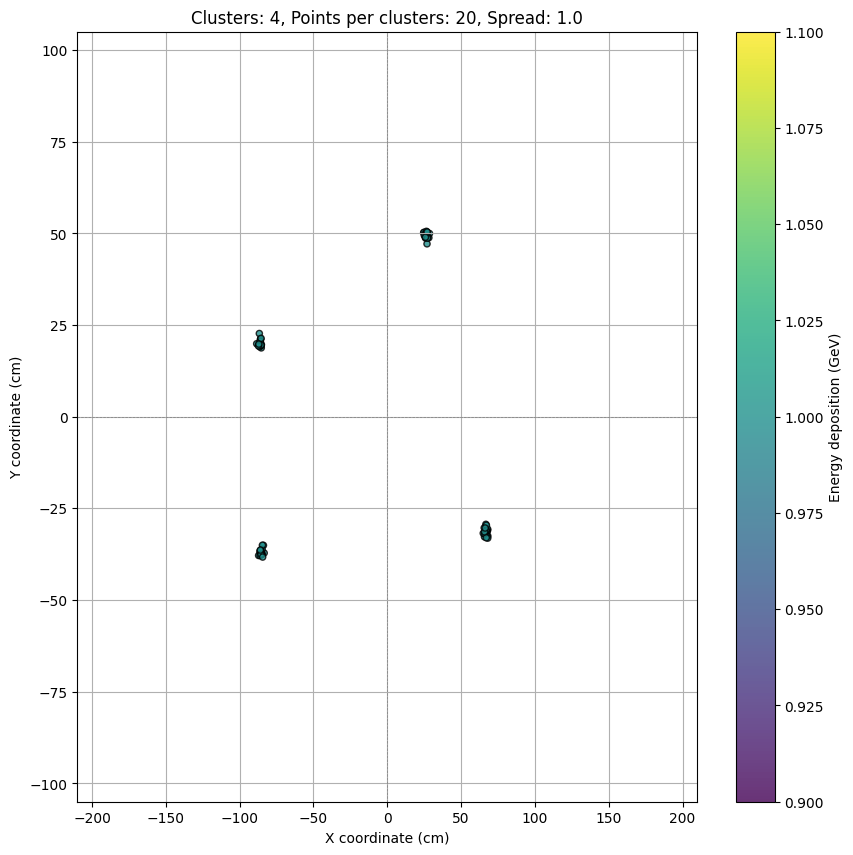

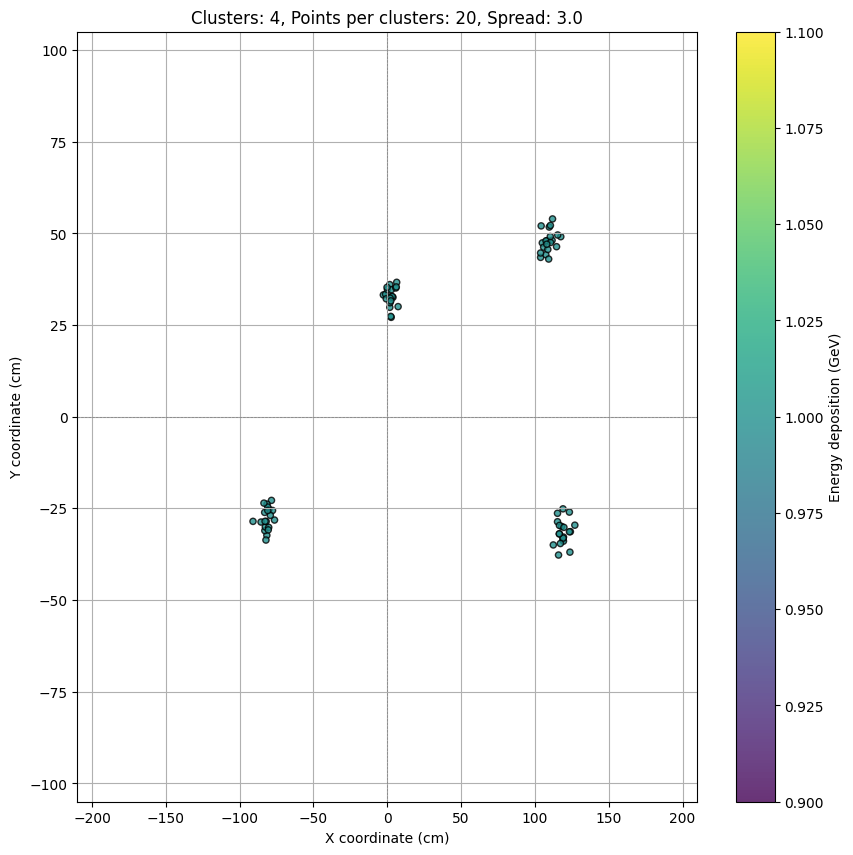

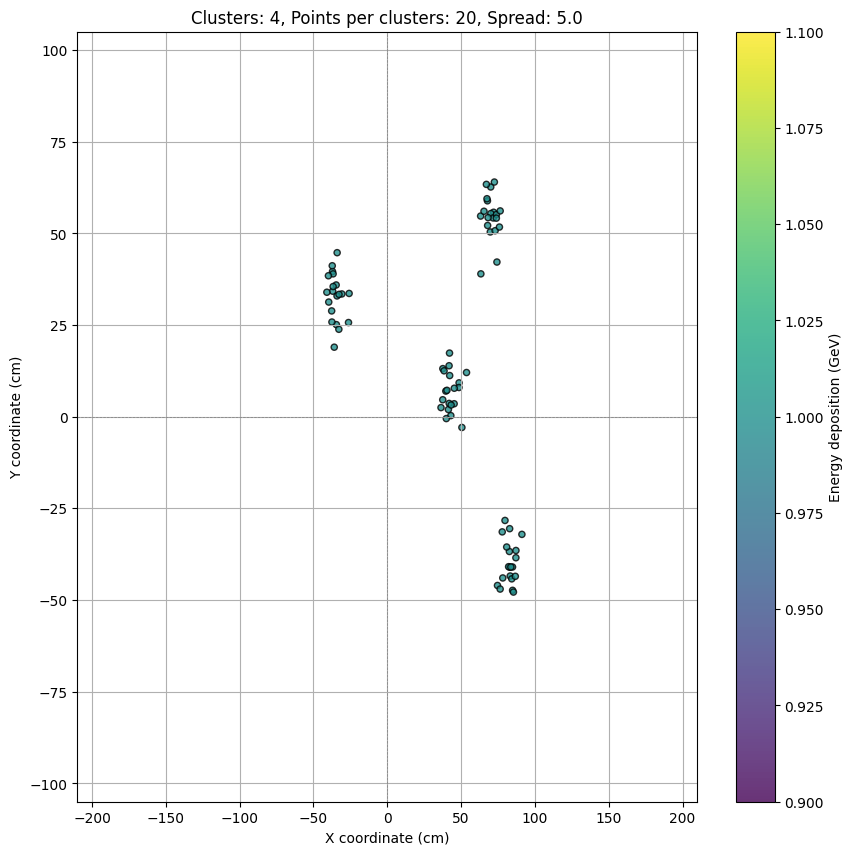

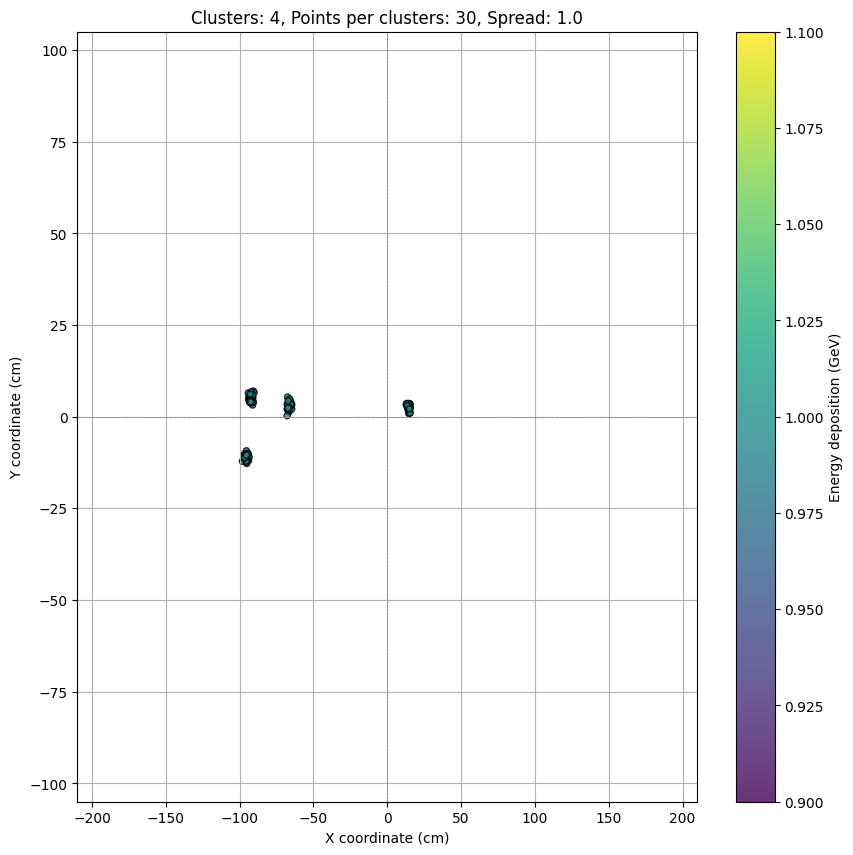

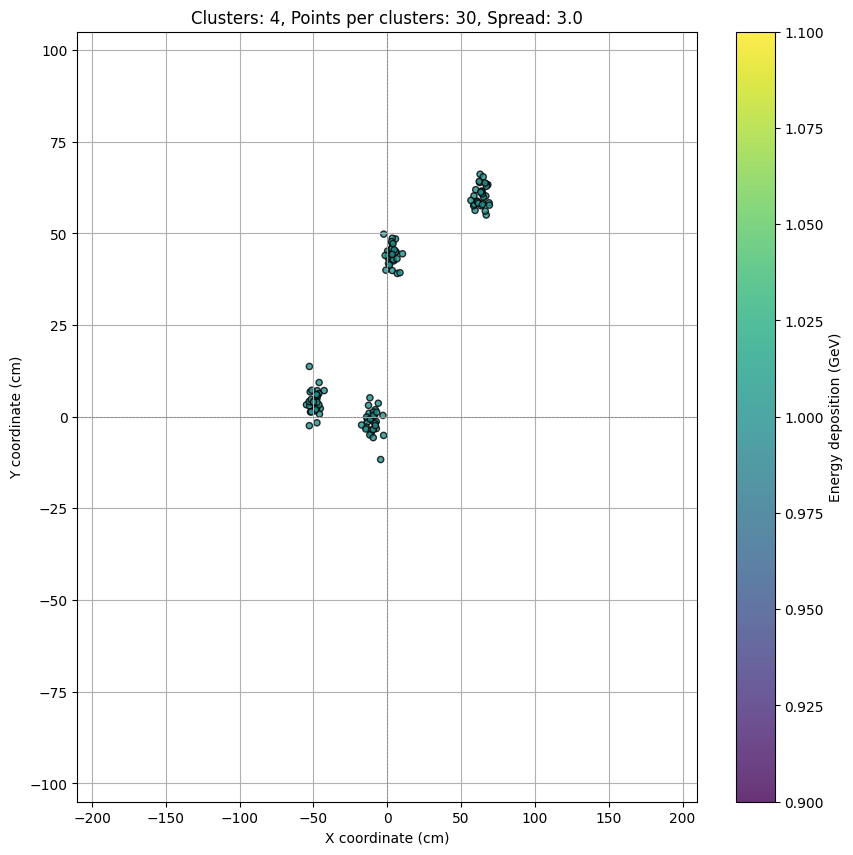

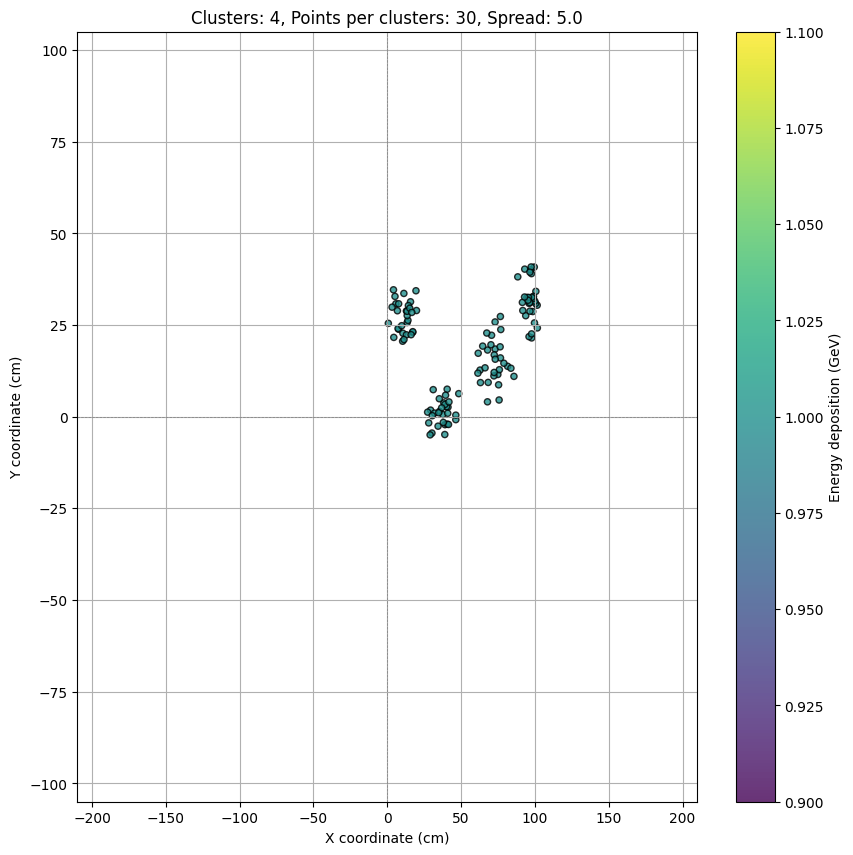

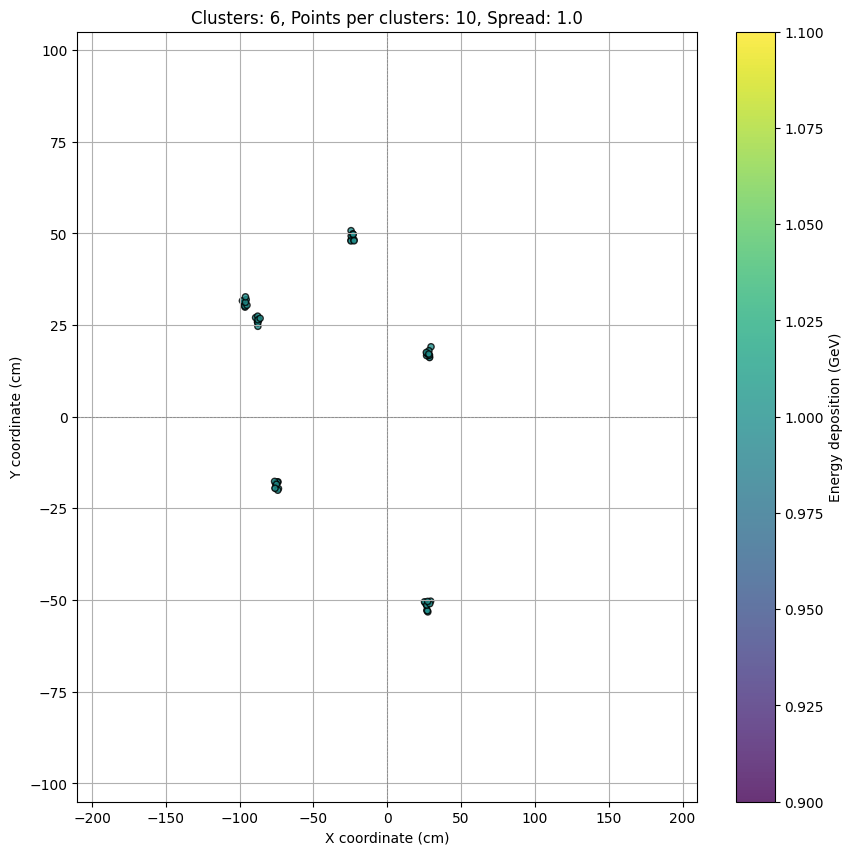

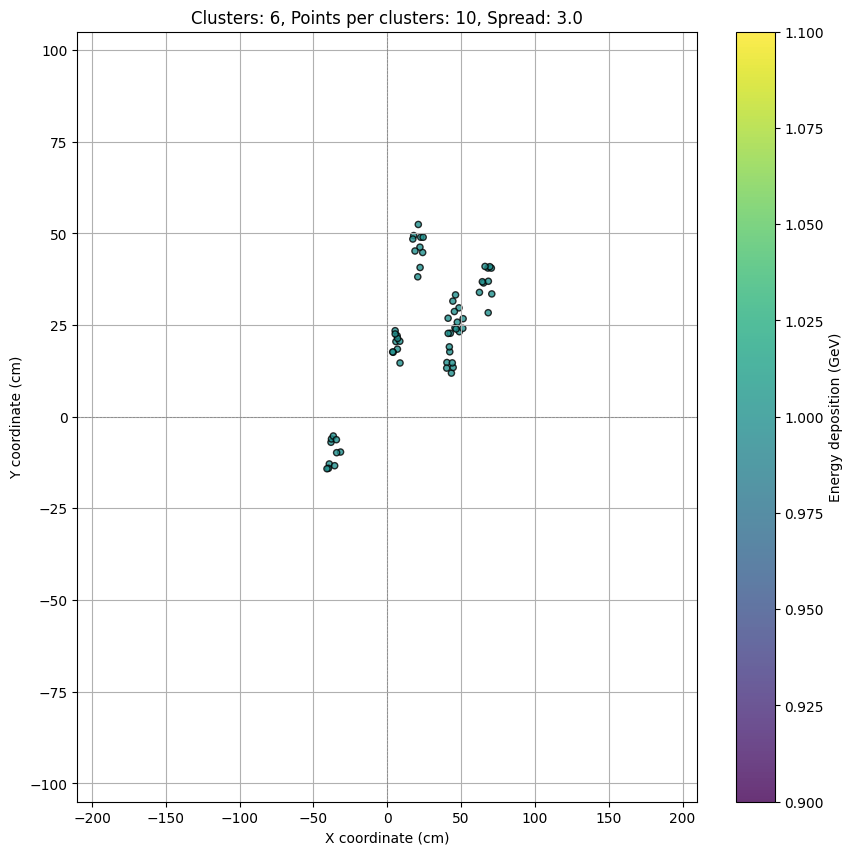

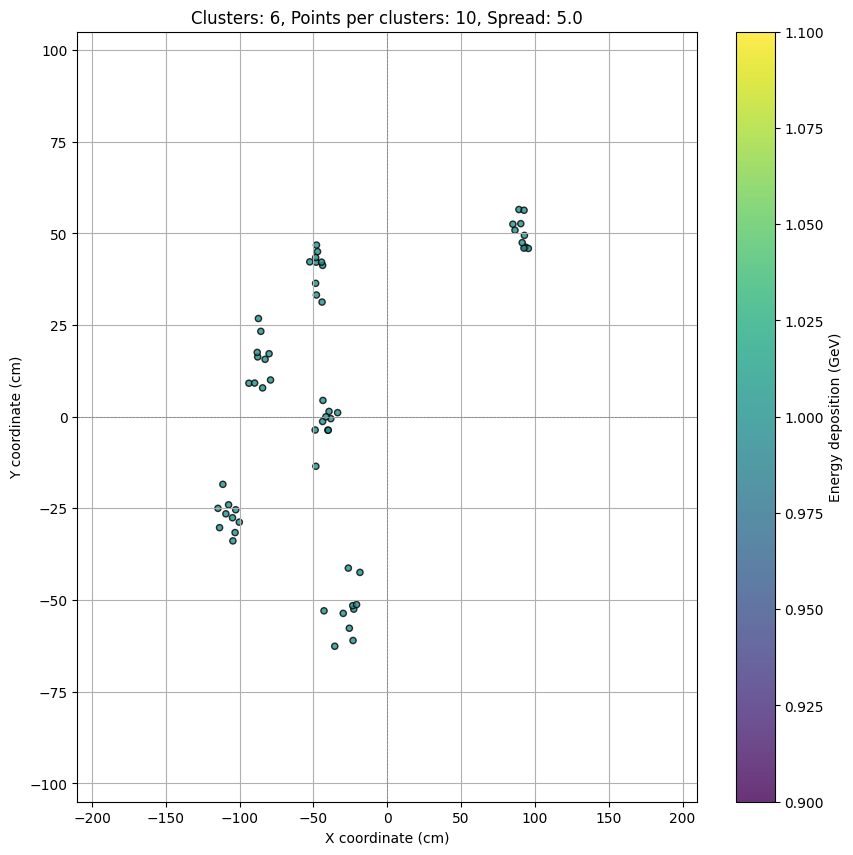

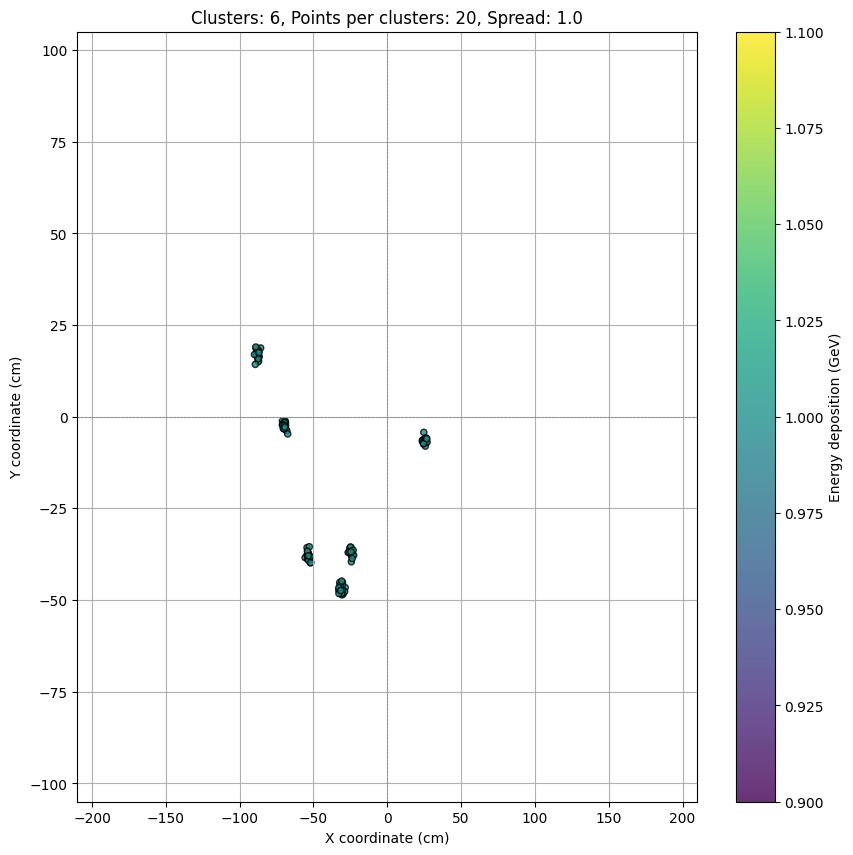

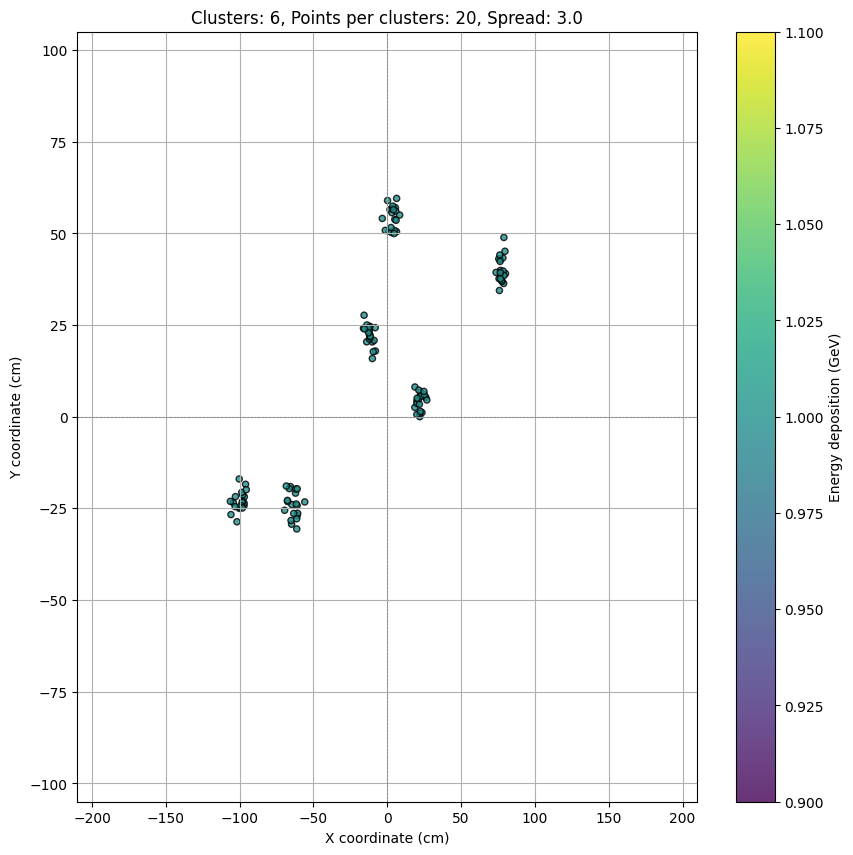

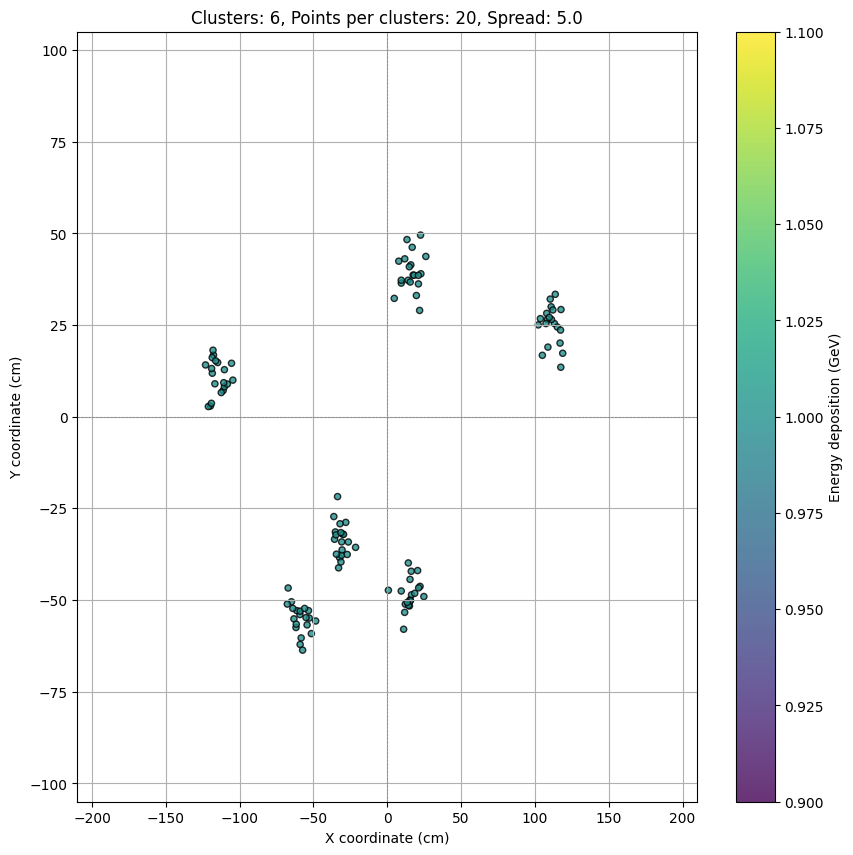

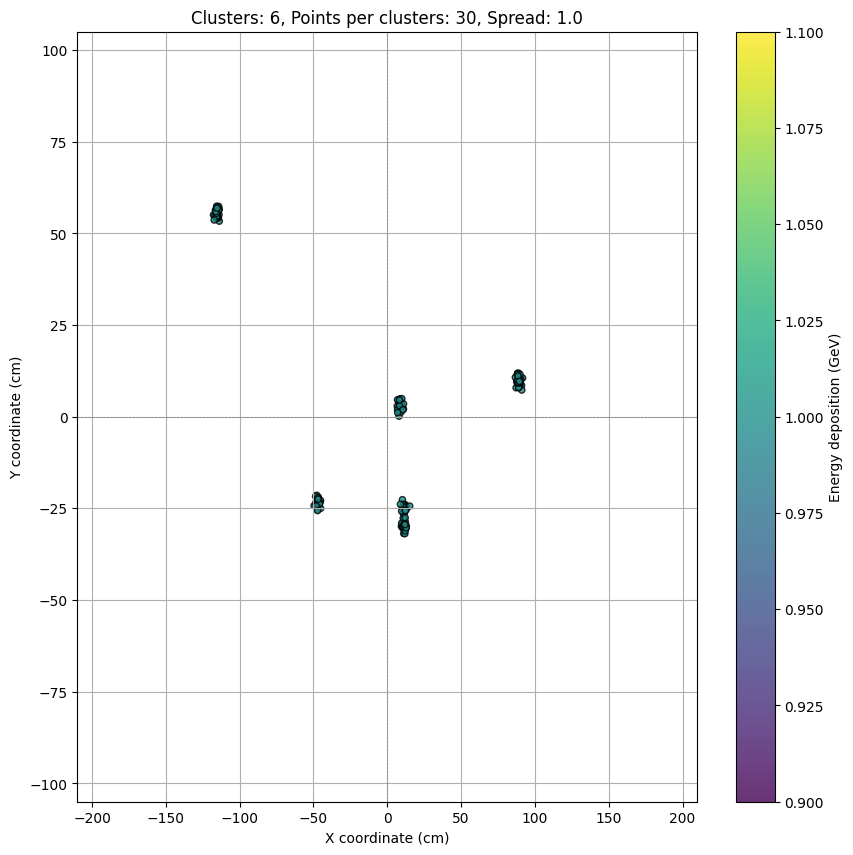

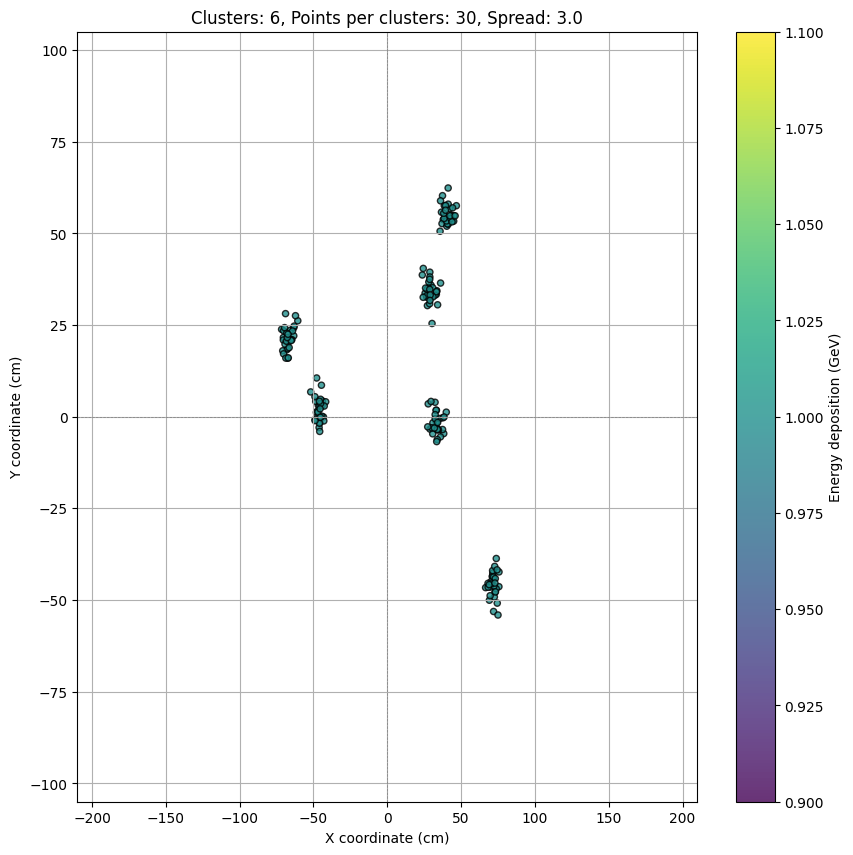

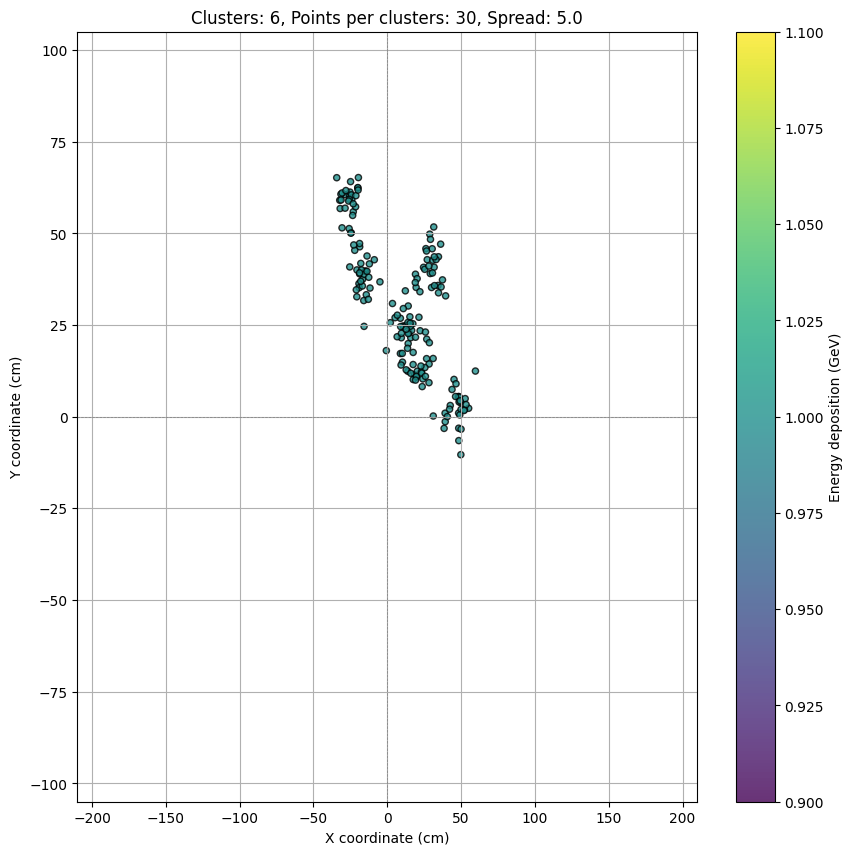

In [37]:
def generate_2d_points(num_clusters, points_per_cluster, spread, random_seed=42):
    np.random.seed(random_seed)
    data = []

    for i in range(num_clusters):
        center = np.random.uniform([-120, -60], [120, 60])
        cluster_points = center + np.random.randn(points_per_cluster, 2) * spread
        data.append(cluster_points)

    data = np.vstack(data)
    return data


def get_constant_array(array, constant=1):
    return np.full(array.shape[0], constant)


i=0
for n in [2, 4, 6]:
    for p in [10, 20, 30]:
        for s in [1., 3., 5.]:
            i+=1
            coordinates = generate_2d_points(num_clusters=n, points_per_cluster=p, spread=s, random_seed=i)
            energies = get_constant_array(array=coordinates, constant=1)
            plot_spatial_energy_matrix(coordinates=coordinates, energies=energies, title=f'Clusters: {n}, Points per clusters: {p}, Spread: {s}')

<div class="alert alert-info" role="alert">

<h3>🧩 Exercise: K-Means Clustering</h3>

<hr>

<h4>What is Cluster Analysis?</h4>

<p>
Cluster analysis is the process of <strong>grouping together similar points into clusters</strong>.
A <em>point</em> can have 2, 3, or even hundreds of dimensions — meaning it’s a vector in some space.
</p>

<p>
One practical example is <strong>epidemiological clustering</strong>:
you might have 2D points representing the <strong>longitude and latitude</strong> of locations where birds carrying different strains of avian flu were found.
By clustering these points, you can gain insight into which regions correspond to each strain.
</p>

<hr>

<h4>Distances Between Points</h4>

<p>
To cluster data, we must measure <strong>how close or far</strong> points are from each other.
The <strong>Euclidean distance</strong> is the most common measure.
</p>

<p>For two 2D points:</p>
\[
d(p, q) = \sqrt{(p_x - q_x)^2 + (p_y - q_y)^2}
\]

<p>For two 3D points:</p>
\[
d(p, q) = \sqrt{(p_x - q_x)^2 + (p_y - q_y)^2 + (p_z - q_z)^2}
\]

<p>In general, for two \(n\)-dimensional points
\(p = (p_1, p_2, \dots, p_n)\) and \(q = (q_1, q_2, \dots, q_n)\):</p>
\[
d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \cdots + (p_n - q_n)^2}
\]

<p><strong>Example:</strong></p>
\[
p = (0.1, 0.2, 0.3, 0.4), \quad q = (0.0, 0.2, 0.3, 0.2)
\]
\[
d(p, q) = \sqrt{(0.1-0.0)^2 + (0.2-0.2)^2 + (0.3-0.3)^2 + (0.4-0.2)^2} = 0.7071\ldots
\]

<hr>

<h4>Cluster Centroids</h4>

<p>
The <strong>centroid</strong> of a cluster is its <em>center of mass</em> — the <strong>average position</strong> of all points in that cluster.
Even though it’s the mean of all cluster points, the centroid does <em>not</em> need to be one of those points.
</p>

<p>To compute a centroid:</p>
\[
\text{centroid} = \frac{1}{N} \sum_{i=1}^{N} p_i
\]

<p>Vector operations:</p>
\[
p + q = (p_1 + q_1,\, p_2 + q_2,\, \dots,\, p_n + q_n)
\]
\[
\frac{p}{a} = \left(\frac{p_1}{a},\, \frac{p_2}{a},\, \dots,\, \frac{p_n}{a}\right)
\]

<hr>

<h4>The K-Means Algorithm</h4>

<p>
The <strong>idea</strong> behind K-Means is simple:
each point belongs to the cluster whose centroid (mean) it is <strong>closest</strong> to.
Because centroids depend on which points are assigned to them, and assignments depend on centroids, we solve this <em>chicken-and-egg</em> problem iteratively.
</p>

<h5>Step 1. Pick \(k\) Centroids</h5>

<p>
We start by choosing \(k\), the number of clusters we want.
Each centroid \(m_j\) is an \(n\)-dimensional point:
</p>
\[
m_j = (m_{j,1}, m_{j,2}, \dots, m_{j,n})
\]
<p>
We randomly select \(k\) points from the dataset as our <strong>initial centroids</strong>
(the <em>Forgy method</em>).
</p>

<h5>Step 2. Partition the Dataset</h5>

<p>
Assign each point to the <strong>nearest centroid</strong> by Euclidean distance.
If a point is equally close to multiple centroids, break ties arbitrarily.
This produces \(k\) sets \(S_1, S_2, \dots, S_k\),
where each \(S_j\) contains all points closest to centroid \(m_j\).
</p>

<h5>Step 3. Recompute the Means</h5>

<p>For each cluster \(S_j\), recompute its centroid:</p>
\[
m_j = \frac{1}{|S_j|} \sum_{q \in S_j} q
\]
<p>
Since centroids have changed, some points may now be closer to a different centroid —
so we repeat the assignment step.
</p>

<h5>Step 4. Repeat Until Convergence</h5>

<ul>
  <li>The centroids stop moving, or</li>
  <li>The assignments no longer change.</li>
</ul>

<p>
Sometimes convergence takes many iterations, so we often set a
<strong>maximum iteration limit</strong> to prevent infinite loops.
</p>

<hr>

<h4>Summary of the K-Means Algorithm</h4>

<ol>
  <li>Choose \(k\) and initialize centroids randomly.</li>
  <li>Assign each point to the nearest centroid.</li>
  <li>Recompute each centroid as the mean of its assigned points.</li>
  <li>Repeat steps 2–3 until centroids stop changing or max iterations reached.</li>
</ol>

<hr>

<p><strong>✅ Key Idea:</strong>  
K-Means minimizes the <em>within-cluster sum of squared errors</em> (inertia) —  
the total squared distance between points and their assigned centroids.</p>

</div>


<div class="alert alert-info">
<strong>Exercise:</strong> 
Fill the missing parts in the following class to implement the k-means algorithm.
</span>
</div>

In [38]:
import numpy as np
import random

class KMeans:
    """
    Minimal NumPy-only K-Means with functionized steps.

    Parameters
    ----------
    n_clusters : int
        Number of clusters (K).
    init : {"k-means++", "random"}
        Initialization scheme.
    max_iter : int
        Maximum iterations.
    tol : float
        Convergence tolerance on centroid shift (Euclidean norm).
    random_state : int or None
        Seed for reproducibility.
    """

    def __init__(self, n_clusters, init="k-means++", max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters   = int(n_clusters)
        self.init         = init
        self.max_iter     = int(max_iter)
        self.tol          = float(tol)
        self.random_state = random_state

        # Attributes set after fitting
        self.cluster_centers_ = None
        self.labels_          = None
        self.inertia_         = None
        self.n_iter_          = None

    # ---------- core primitives ----------

    def _euclidean_squared(self, a, b):
        """
        Squared Euclidean distances between rows of a (n_samples, d)
        and rows of b (n_centroids, d). Returns (n_samples, n_centroids).
        """
        a2 = np.sum(a * a, axis=1, keepdims=True)
        b2 = np.sum(b * b, axis=1)
        ab = a @ b.T
        return a2 - 2.0 * ab + b2
    
    
    def _kmeanspp_init(self, X, rng):
        """
        k-means++ initialization. Returns (K, d) array of initial centroids.
        """
        n_samples, n_features = X.shape
        centroids = np.empty((self.n_clusters, n_features), dtype=X.dtype)

        # 1) choose first centroid uniformly
        idx0 = rng.integers(0, n_samples)
        centroids[0] = X[idx0]

        # 2) choose remaining with probability proportional to D^2
        closest_dist_sq = self._euclidean_squared(X, centroids[0:1]).ravel()
        for i in range(1, self.n_clusters):
            probs = closest_dist_sq / closest_dist_sq.sum()
            idx = rng.choice(n_samples, p=probs)
            centroids[i] = X[idx]
            d2 = self._euclidean_squared(X, centroids[i:i+1]).ravel()
            closest_dist_sq = np.minimum(closest_dist_sq, d2)
        return centroids

    # ---------- step-by-step methods ----------
    #rng = np.random.default_rng(42)
    def _initialize_centroids(self, X, rng=None):
        """Step 2: Initialize centroids randomly."""
        n_samples = X.shape[0]
        # Set Python random seed if random_state was provided
        if self.random_state is not None:
            random.seed(self.random_state)
        # Choose unique random indices for centroids
        indices = random.sample(range(n_samples), self.n_clusters)
        centroids = X[indices].copy()
        return centroids

    def _assign(self, X, centroids):
        """Step 3: Assignment — return (labels, d2)."""
        d2 = self._euclidean_squared(X, centroids)
        labels = np.argmin(d2, axis=1)
        return labels, d2

    def _update(self, X, labels, rng):
        """Step 4: Update — compute new centroids, handle empty clusters by re-seeding."""
        K, d = self.n_clusters, X.shape[1]
        new_centroids = np.empty((K, d), dtype=float)
        for j in range(K):
            mask = (labels == j)
            if np.any(mask):
                new_centroids[j] = X[mask].mean(axis=0)
            else:
                # reinitialize empty cluster to a random point
                new_centroids[j] = X[rng.integers(0, X.shape[0])]
        return new_centroids

    def _converged(self, old_centroids, new_centroids, old_labels, new_labels):
        """Step 5: Convergence check — label stability OR centroid shift < tol."""
        if old_labels is not None and np.array_equal(old_labels, new_labels):
            return True
        shift = float(np.sqrt(np.sum((new_centroids - old_centroids) ** 2)))
        return shift < self.tol

    def _compute_inertia(self, X, labels, centroids):
        """Step 6: Inertia (within-cluster SSE)."""
        return float(np.sum((X - centroids[labels]) ** 2))

    # ---------- public API ----------

    def fit(self, X):
        """
        Run K-Means on X.
        """
        X = np.asarray(X, dtype=float)
        rng = np.random.default_rng(self.random_state)

        centroids = self._initialize_centroids(X, rng)
        labels = None

        for it in range(1, self.max_iter + 1):
            new_labels, _ = self._assign(X, centroids)
            new_centroids = self._update(X, new_labels, rng)

            if self._converged(centroids, new_centroids, labels, new_labels):
                centroids = new_centroids
                labels = new_labels
                break

            centroids = new_centroids
            labels = new_labels

        # Final metrics
        inertia = self._compute_inertia(X, labels, centroids)

        # Set attributes
        self.cluster_centers_ = centroids
        self.labels_ = labels
        self.inertia_ = inertia
        self.n_iter_ = it
        return self

    def predict(self, X):
        """
        Assign cluster indices for new samples using fitted centroids.
        """
        if self.cluster_centers_ is None:
            raise RuntimeError("Model is not fitted. Call .fit(X) first.")
        X = np.asarray(X, dtype=float)
        labels, _ = self._assign(X, self.cluster_centers_)
        return labels

    def fit_predict(self, X):
        """
        Convenience: fit the model and return labels for X.
        """
        self.fit(X)
        return self.labels_

<div class="alert alert-info">
<strong>Unit test 1:</strong> 
Use the cell below to evalue inertia and iterations K-Means you have implemented. Then, compare with the sk-learn implementation.
</span>
</div>

In [39]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans as SKKMeans
from sklearn.metrics import adjusted_rand_score

# ---- Load Iris dataset ----
iris = load_iris()
X = iris.data
y_true = iris.target

# ---- Your implementation ----
my_km = KMeans(n_clusters=3, init="k-means++", max_iter=300, tol=1e-4, random_state=34)
my_labels = my_km.fit_predict(X)

print("=== Your KMeans ===")
print(f"Iterations: {my_km.n_iter_}")
print(f"Inertia:    {my_km.inertia_:.4f}")
print(f"ARI vs true labels: {adjusted_rand_score(y_true, my_labels):.4f}")

# ---- scikit-learn implementation ----
sk_km = SKKMeans(n_clusters=3, init="k-means++", n_init=1, max_iter=300, tol=1e-4,
                 algorithm="lloyd", random_state=42)
sk_labels = sk_km.fit_predict(X)

print("\n=== scikit-learn KMeans ===")
print(f"Iterations: {sk_km.n_iter_}")
print(f"Inertia:    {sk_km.inertia_:.4f}")
print(f"ARI vs true labels: {adjusted_rand_score(y_true, sk_labels):.4f}")

=== Your KMeans ===
Iterations: 7
Inertia:    78.8514
ARI vs true labels: 0.7302

=== scikit-learn KMeans ===
Iterations: 11
Inertia:    78.8557
ARI vs true labels: 0.7163


<div class="alert alert-info">
<strong>Unit test 2:</strong> 
Import the external unit test, check if home-brewed K-Means has passed all the test
</span>
</div>

In [40]:
%run -i unit_test.py

Running KMeans standalone tests...
  ✓ test_basic_shapes_and_types
  ✓ test_determinism_with_seed
  ✓ test_predict_matches_training_assignment
  ✓ test_inertia_definition
All tests passed!


<a name='section_3_2'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 3.2: Finding optimal number of centroids</h3>

$K$-means is an efficient method that works well with large datasets, making it ideal for quickly organizing data into clusters based on similarity.
However, one limitation is that the number of clusters, $K$, must be predetermined, which can be challenging without prior knowledge of the data structure.
To address this, techniques such as the Elbow and the Silhouette methods are often used to find the optimal number of clusters, helping to ensure that the chosen $K$ best captures the natural groupings within the data.
In any case, for a given event, one must run the $K$-means algorithm multiple times, scanning different values of $K$ and identifying the optimal value of $K$.

$\textbf{Elbow method}$

The Elbow Method helps find the optimal number of clusters \( K \) by computing the within-cluster sum of squares (WCSS$_K$):
$$
    \text{WCSS}_K = \sum_{i=1}^{K} \sum_{x \in C_i} \| x - \mu_i \|^2
$$
where $K$ is the number of clusters, $C_i$ is the $i$-th cluster, $x$ is a hit in the cluster, $\mu_i$ is the centroid of the cluster $C_i$, and $\| x - \mu_i \|^2$ is the squared Euclidean distance between the hit and the centroid.
If you plot WCSS$_K$ as a function of $K$, you will notice that as \( K \) increases, WCSS$_K$ decreases.
The "elbow" point, where the decrease slows down "sharply", indicates the optimal \( K \).

To determine the elbow point more precisely, you can:
calculate the second derivative of WCSS with respect to \( K \) and identify the point with the largest change, indicating the most significant slowdown in the rate of decrease;
use algorithms such as the "Kneedle" algorithm, which automatically detects the "knee" or "elbow" in the curve by analyzing the curvature.

$\textbf{Silouette method}$

The Silhouette method evaluates the quality of clustering by calculating a "silhouette score" for each hit, based on how similar it is to hits in its own cluster compared to hits in the nearest other cluster. For a given number of clusters \( K \), the average silhouette score $S$ ranges from -1 to 1: $S$ near 1 indicates well-clustered hits, close to their own cluster and far from others; $S$ near 0 indicates the presence of hits on the boundary between clusters (overlapping clusters); a negative $S$ indicates that many hits are assigned to the wrong cluster.

To determine the optimal \( K \), calculate the average silhouette score for different \( K \) values and choose the \( K \) that maximizes this score, indicating the best-defined clusters.
Here is a method to calculate the silhouette score $S$:

- Compute the intra-cluster distance $a_i$: for each hit $i$ in a cluster, compute the average Euclidean distance to all other points within the same cluster.
- Compute the nearest cluster distance $b_i$: for each hit $i$ in a cluster, compute the average euclidean distance to all points of another cluster; repeat for all clusters and take the smallest average distance computed.
- Compute silhouette hit score $s_i$: for each hit $i$ in a cluster, compute
    $$
    s_i = \frac{b_i - a_i}{\max(a_i, b_i)}
    $$
    and repeat it for all hits in the event.
- Calculate the average silhouette score $S$ of the event, i.e. the average of $s_i$ over all hits in the event.

<div class="alert alert-info">
<strong>Exercise:</strong> 
Implement an elbow method for your K-means algorithm and test it on a few events to evaluate its performance. </span>
</div>

###############################################################################################
Generating 2 clusters...


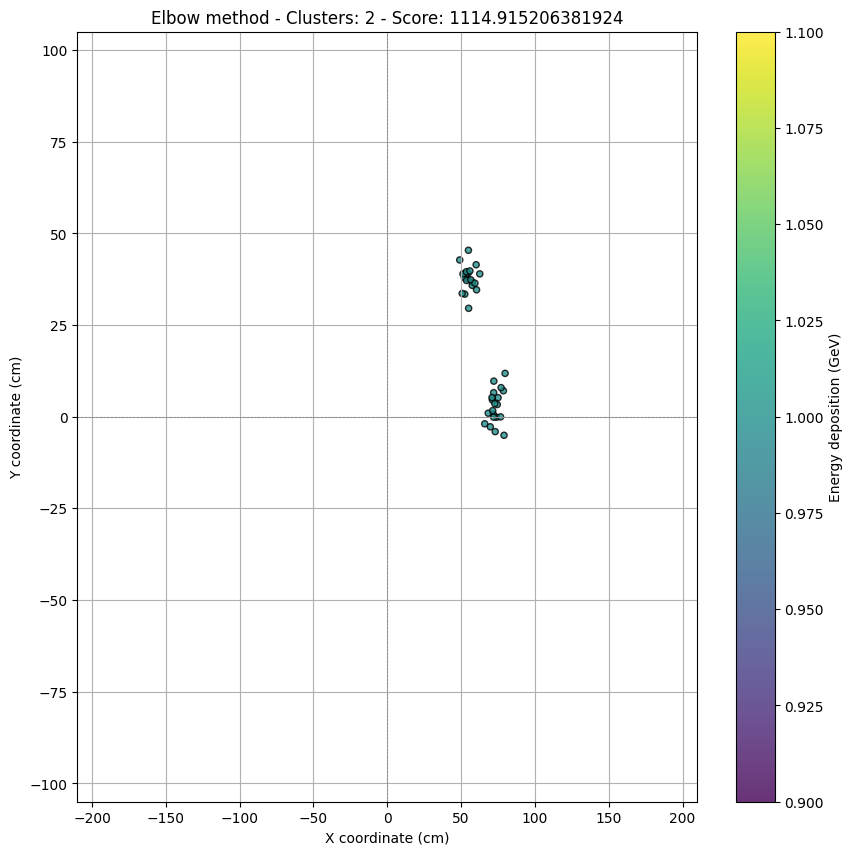

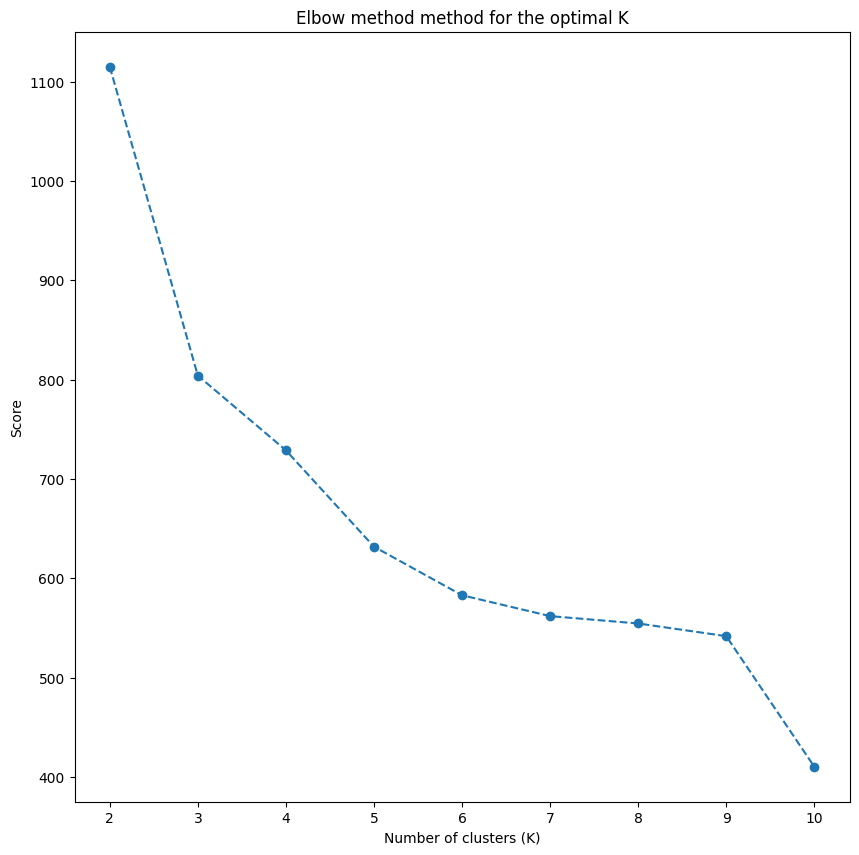

###############################################################################################
Generating 4 clusters...


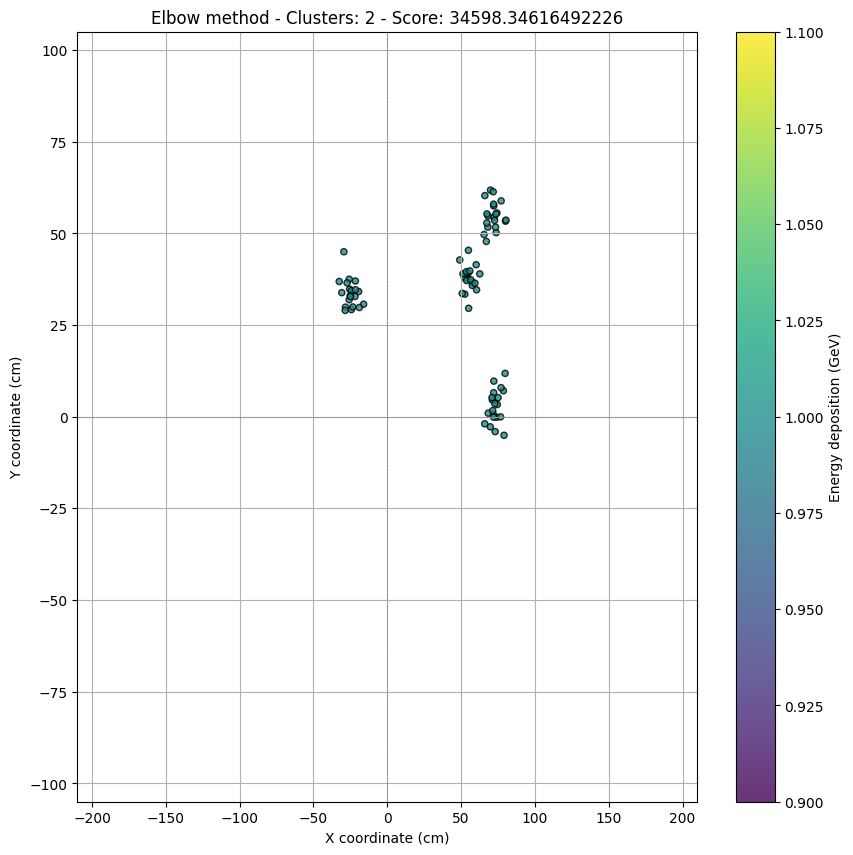

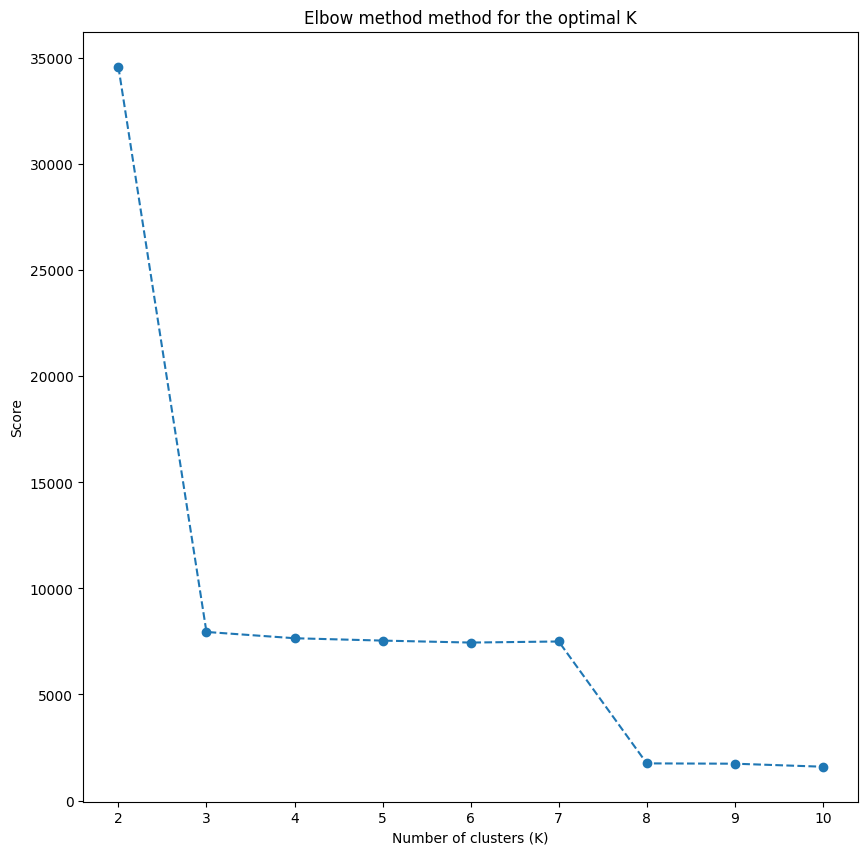

###############################################################################################
Generating 6 clusters...


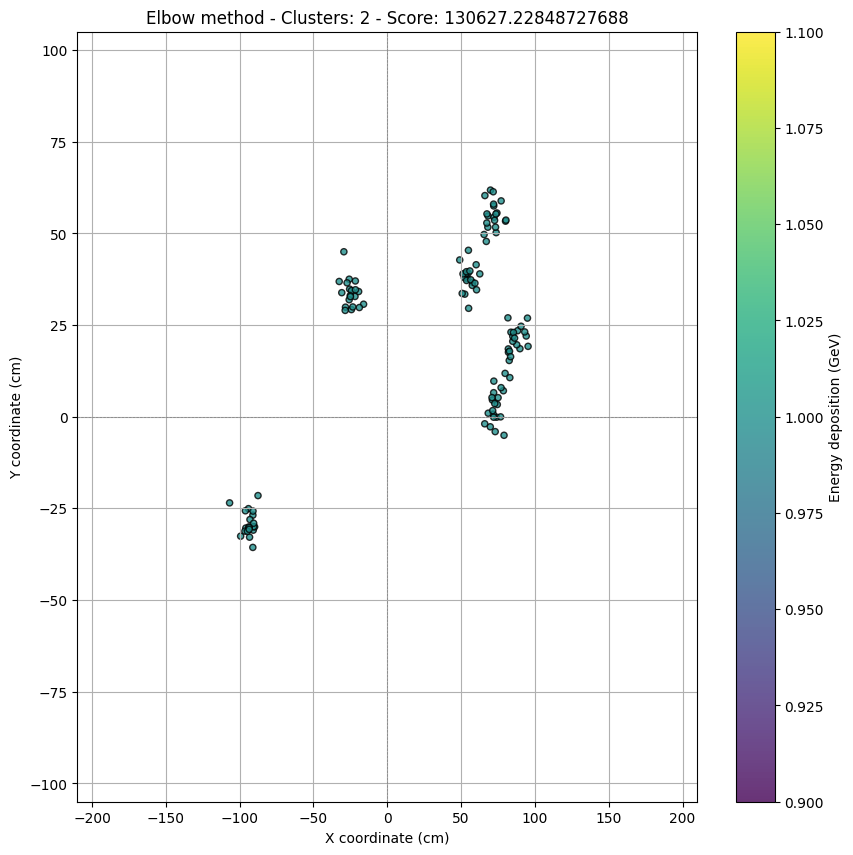

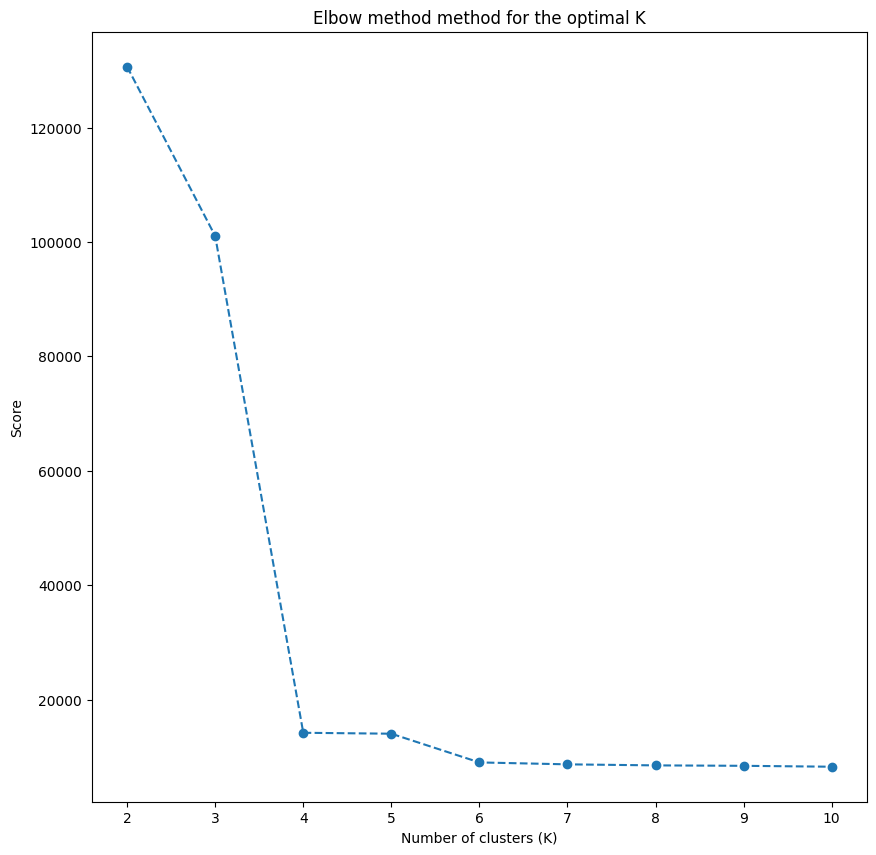

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# your home-brewed KMeans class must be defined/imported above this point


def evaluate_method(data, score_method, title_label,
                    min_k=1, max_k=10, random_state=42):
    
    score_values = []

    do_plot=True
    for k in range(min_k, max_k + 1):
        # --- use your KMeans class instead of a KMeans(...) function ---
        kmeans = KMeans(
            n_clusters=k,
            init="k-means++",     # or "random" if you prefer
            max_iter=300,
            tol=1e-4,
            random_state=random_state
        )
        kmeans.fit(data)

        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_

        # generic scoring function (e.g. wcss_score, silhouette, etc.)
        score = score_method(data, centroids, labels)

        energies = get_constant_array(data)

        if do_plot==True:
            plot_spatial_energy_matrix(
                data,
                energies,
                centroids=centroids,
                labels=labels,
                title=f'{title_label} - Clusters: {k} - Score: {score}'
            )
            do_plot=False
        score_values.append(score)

    # plot the score vs K (elbow method style)
    plt.figure(figsize=(10, 10))
    plt.plot(range(min_k, max_k + 1), score_values, marker='o', linestyle='--')
    plt.title(f"{title_label} method for the optimal K")
    plt.xlabel("Number of clusters (K)")
    plt.ylabel("Score")
    plt.show()


def wcss_score(data, centroids, labels):
    """
    Compute within-cluster sum of squares given centroids & labels.
    (You could also just use kmeans.inertia_, but this keeps it generic.)
    """
    wcss = 0.0
    k = len(centroids)
    for i in range(k):
        cluster_points = data[labels == i]
        centroid = centroids[i]
        squared_distances = np.sum((cluster_points - centroid) ** 2, axis=1)
        wcss += np.sum(squared_distances)
    return wcss


# driving example, unchanged except KMeans usage inside evaluate_method
for n in [2, 4, 6]:
    print('###############################################################################################')
    print(f'Generating {n} clusters...')
    coordinates = generate_2d_points(
        num_clusters=n,
        points_per_cluster=20,
        spread=4.,
        random_seed=999
    )
    evaluate_method(
        data=coordinates,
        score_method=wcss_score,
        title_label='Elbow method',
        min_k=2,
        max_k=10,
    )
    do_plot=False

<div class="alert alert-info">
<strong>Exercise:</strong> 
Implement a silhouette method for your K-means algorithm and test it on a few events to evaluate its performance.
</span>

###############################################################################################
Generating 2 clusters...


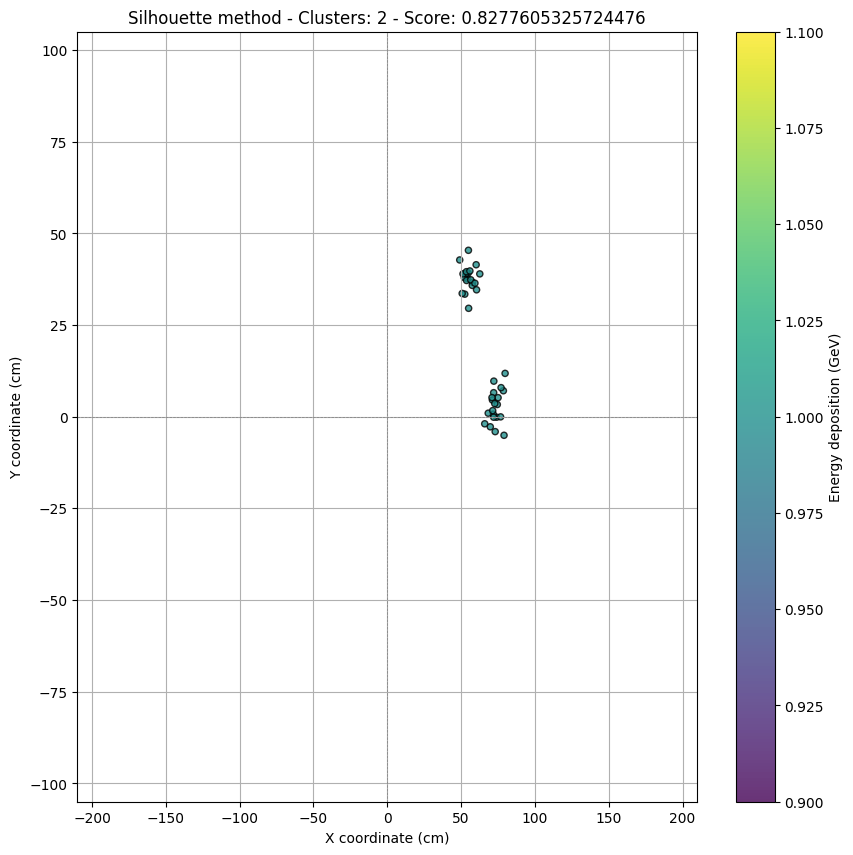

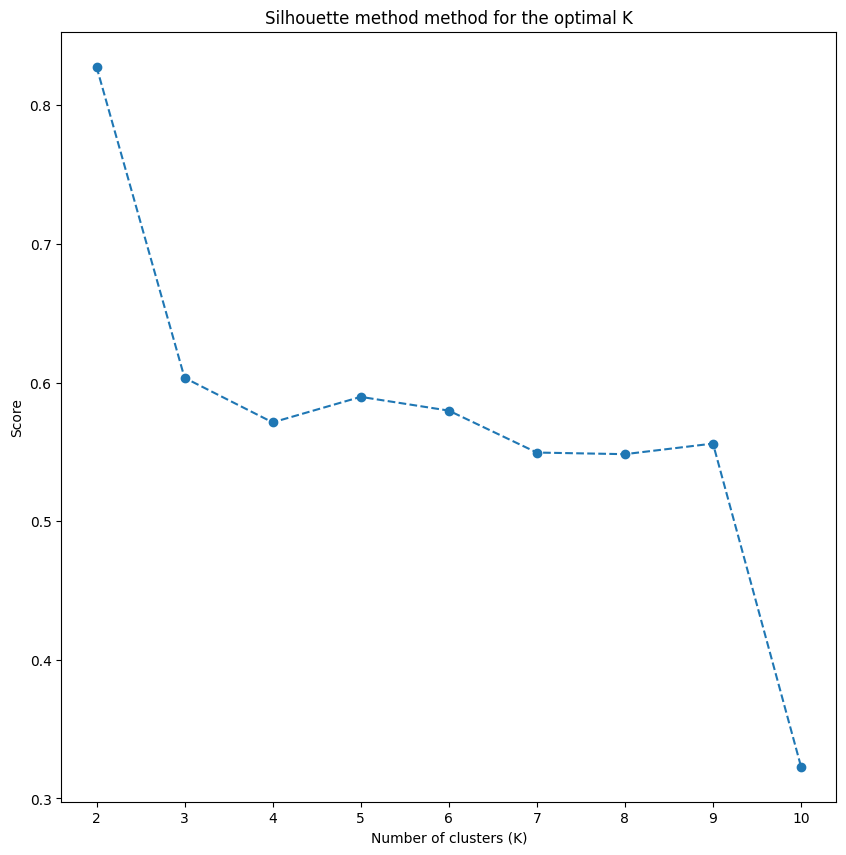

###############################################################################################
Generating 4 clusters...


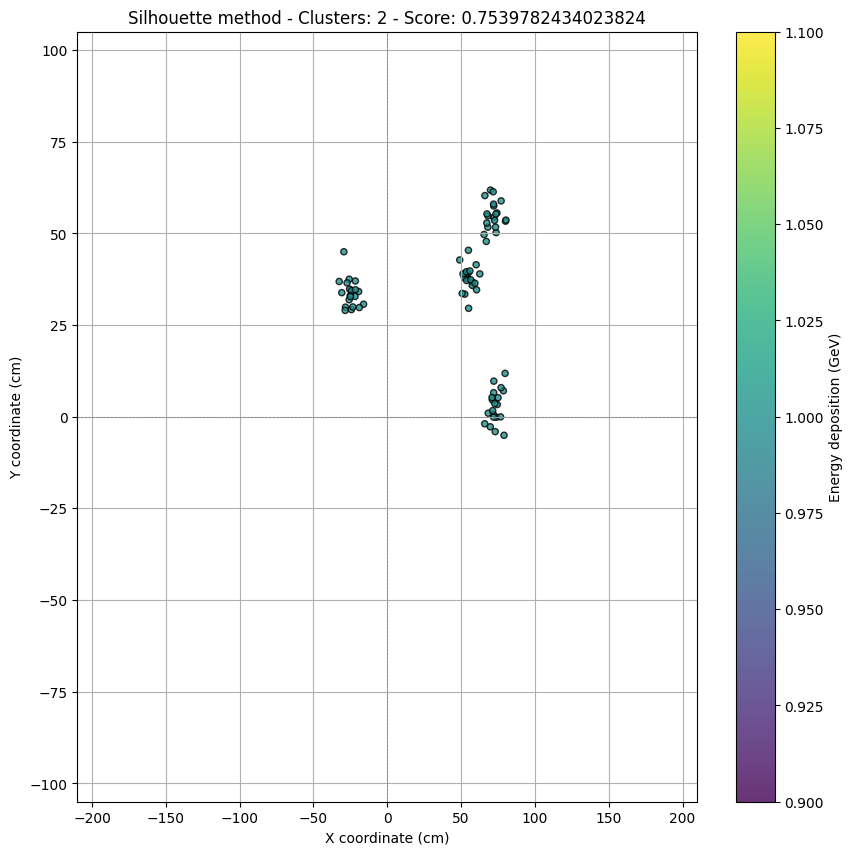

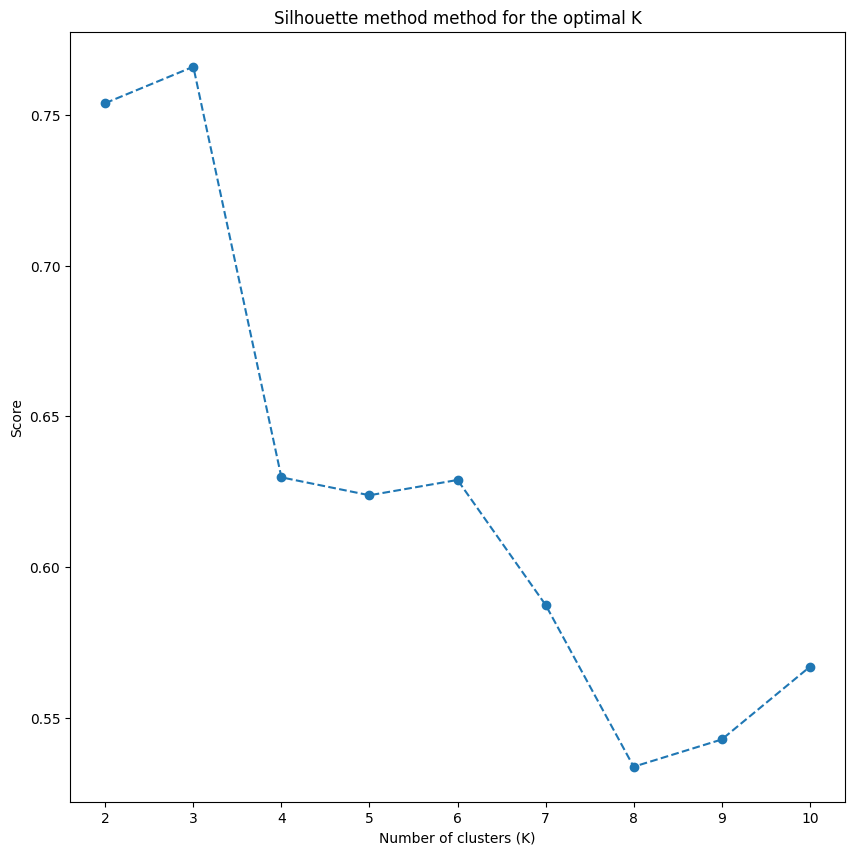

###############################################################################################
Generating 6 clusters...


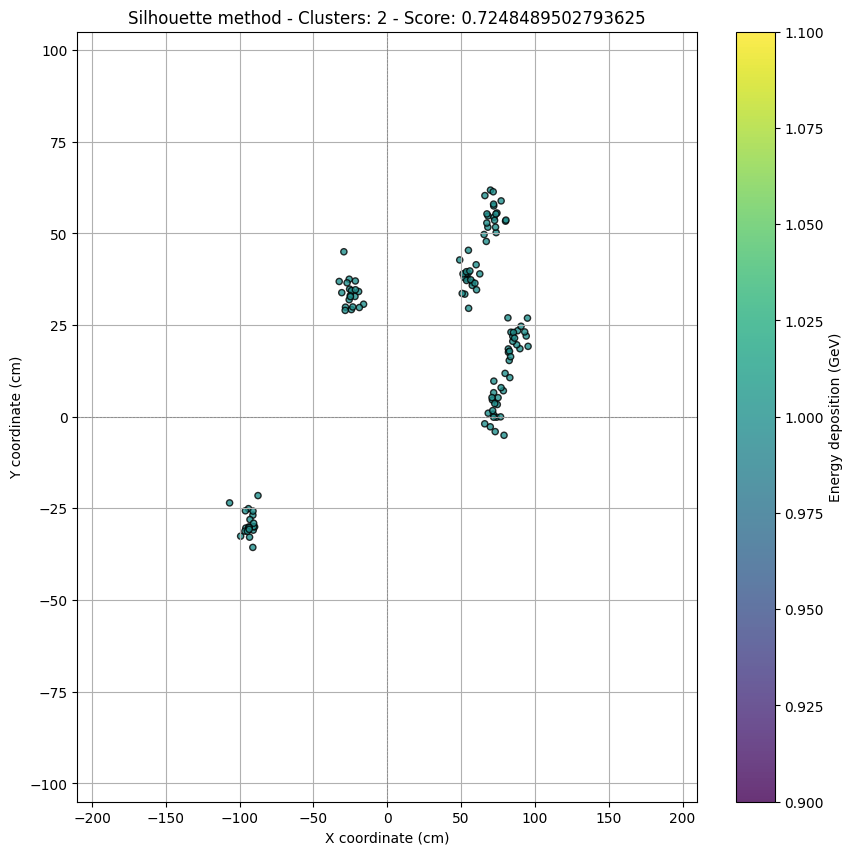

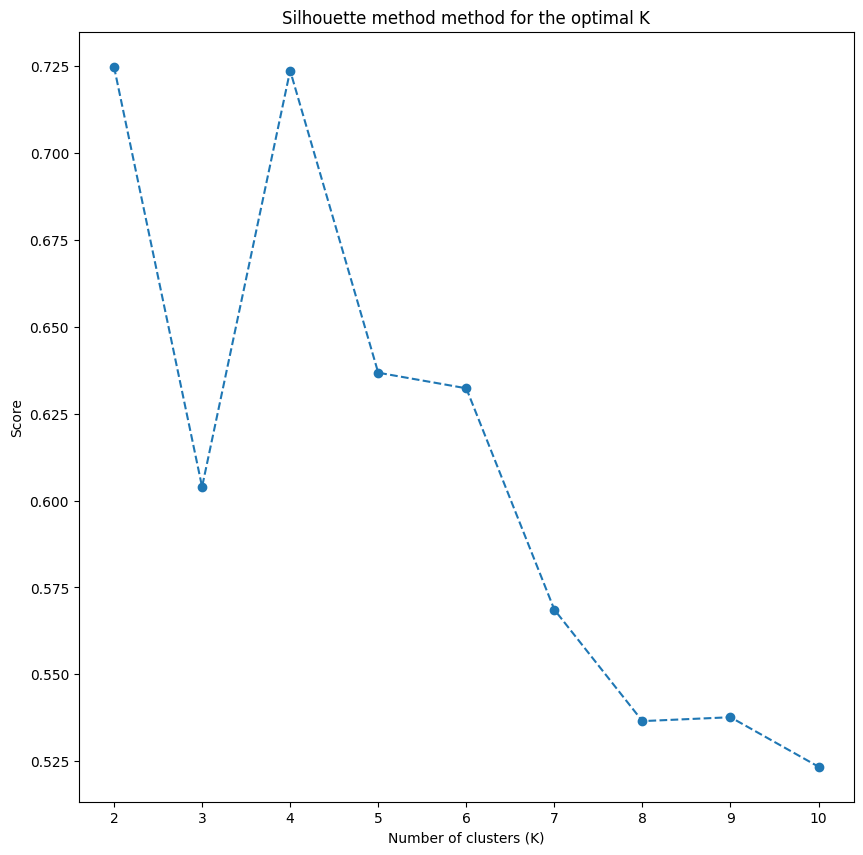

In [53]:
def silhouette_score(data, centroids, labels):
    """
    Compute the mean silhouette score given:
    - data: (N, d)
    - centroids: (K, d)  (not strictly needed but kept for API compatibility)
    - labels: (N,) with integer labels in [0, K-1]

    Returns: scalar mean silhouette score in [-1, 1].
    """
    data = np.asarray(data)
    labels = np.asarray(labels)
    n_samples = data.shape[0]
    k = len(centroids)

    total_score = 0.0

    for i in range(n_samples):
        point = data[i]
        point_label = labels[i]

        same_cluster_mask = (labels == point_label)
        same_cluster_points = data[same_cluster_mask]

        intra_distances = np.linalg.norm(same_cluster_points - point, axis=1)

        if intra_distances.size > 1:
            a_i = intra_distances.sum() / (intra_distances.size - 1)
        else:
            a_i = 0.0

        b_i = float("inf")
        for j in range(k):
            if j == point_label:
                continue  # skip own cluster

            other_cluster_points = data[labels == j]
            if other_cluster_points.size == 0:
                continue  # skip empty clusters, just in case

            inter_distances = np.linalg.norm(other_cluster_points - point, axis=1)
            mean_inter = inter_distances.mean()
            if mean_inter < b_i:
                b_i = mean_inter

        if b_i == float("inf"):
            s_i = 0.0
        else:
            denom = max(a_i, b_i)
            s_i = 0.0 if denom == 0 else (b_i - a_i) / denom

        total_score += s_i

    return total_score / n_samples


for n in [2, 4, 6]:
    print('###############################################################################################')
    print(f'Generating {n} clusters...')
    coordinates = generate_2d_points(num_clusters=n, points_per_cluster=20, spread=4., random_seed=999)
    evaluate_method(
        data=coordinates,
        score_method=silhouette_score,
        title_label='Silhouette method',
        min_k=2,
        max_k=10
    )


<div class="alert alert-success">

*--> (put your text here)*

Comment your results:

- The elbow method, despite apparently simpler, seems to work better for the problem we want to solve. The 'elbow' shape is clear and often visible exactly where expected.
- The silhouette method if more refined, but not fit for this case: especially when close clusters are present, there is some confusion about the actual number of clusters in the event.

<h4> On the Computational Complexity of <em>Elbow</em> vs <em>Silhouette</em> Methods</h4>

<p>Let:</p>

<ul>
  <li>\( n \) — number of points</li>
  <li>\( d \) — dimensionality</li>
  <li>\( k \) — clusters</li>
  <li>\( I \) — K-Means iterations until convergence</li>
  <li>\( K_{\max} \) — maximum number of clusters you scan in your model selection loop</li>
</ul>

<hr>

<h5>A) Elbow Method (WCSS / Inertia)</h5>

<ol>
  <li>Run K-Means once per \(k\):  
      Cost \( \approx \mathcal{O}(n \cdot k \cdot I \cdot d) \) (standard Lloyd’s algorithm).</li>
  <li>Compute WCSS / inertia: obtained during the same pass; extra \( \mathcal{O}(n \cdot d) \).</li>
</ol>

<p>
Per \(k\):  
\[
\boxed{\mathcal{O}(n \cdot k \cdot I \cdot d)}
\]
Scan \(k = 2..K_{\max}\):  
\[
\boxed{\mathcal{O}(K_{\max} \cdot n \cdot k \cdot I \cdot d)}
\]
Memory: \( \mathcal{O}(n \cdot d) \)
</p>

<hr>

<h5>B) Silhouette Method</h5>

<p>
You still need to run K-Means per \(k\):  
\( \mathcal{O}(n \cdot k \cdot I \cdot d) \)
</p>

<p>Then compute silhouette:</p>

<ul>
  <li><strong>Naïve per-point:</strong> for each point, distances to all others  
      \( \Rightarrow \mathcal{O}(n^2 \cdot d) \)</li>
  <li><strong>Precompute distance matrix (per \(k\)):</strong>  
      \( \mathcal{O}(n^2 \cdot d) \) time and \( \mathcal{O}(n^2) \) memory,  
      then reuse to get \(a_i, b_i\) in \( \mathcal{O}(n) \).</li>
</ul>

<p>
Per \(k\) (naïve or precomputed):  
\[
\boxed{\mathcal{O}(n \cdot k \cdot I \cdot d) \;+\; \mathcal{O}(n^2 \cdot d)}
\]
Scan \(k = 2..K_{\max}\):  
\[
\boxed{\mathcal{O}\!\left(K_{\max} \cdot n \cdot k \cdot I \cdot d \;+\; K_{\max} \cdot n^2 \cdot d\right)}
\]
Memory (with precompute): \( \mathcal{O}(n^2) \)
</p>

</div>

$\textbf{Energy seeding}$

Now let's change our approach in the determination of \(K\) from the perspective of physics.
The EMCal readouts provide not only the hit position information, but also the energy deposition measured for each hit.
On top of that, we know that a particle typically deposits large part of its energy in one channel, with only small fractions leaking to the neighboring channels due to the lateral spread of the shower. We can exploit this knowledge to design an algorithm tailored to our physics case.

"Energy seeds" in calorimetry refer to localized points in the detector where the energy deposition is significantly higher than the surrounding areas. These seeds act as initial markers for clustering algorithms, helping to identify and group hits that are likely to belong to the same cluster. By starting with these high-energy regions, energy seed-based clustering improves accuracy in reconstructing particle trajectories and separating overlapping showers.

<div style="text-align: center;">
  <img src="figures/padding.png" width="40%">
  <figcaption style="margin-top: 6px; font-size: 90%;"> Illustration of a possible logic for seed search. </figcaption>
</div>

Here there is an idea for a seed-searching algorithm:
- Suppose we have a $15 \times 15$ EMCal grid and create a $(15+1) \times (15+1)$ 2D array initialized with zeros.
- Assign energy values to the cells based on their $\texttt{elmID}$.
- Apply a minimum energy mask to identify potential energy seed candidates (i.e., we consider as a seed only an energy deposit above a certain threshold).
- Sort the energy seeds in ascending order.
- Add a padding region for each seed candidate. If any hit within the padding region has a higher energy than the candidate, discard the candidate.
  
Loop through the list of energy seed candidates.

The seed candidates you find can then be used as a starting point for the $K$-means clustering algorithm.

<div class="alert alert-info">
<strong>Exercise:</strong> 
Implement a seed-searching algorithm for your K-means algorithm and test it on few events to evaluate its performance. Note that, for this case, you need to use the events from the dielectron sample.

What parameters of the algorithm you can tune to improve its performance?
</span>

In [43]:
def seed_search(channels, energies, min_energy_threshold=5.0, padding_size=1, n_rows=72, n_columns=36):
    # Step 1: Map energies to the 2D energy matrix
    energy_matrix = map_channels_energies_to_matrix(channels, energies, n_rows, n_columns)

    # Step 2: Apply minimum energy threshold to identify potential seed candidates
    # Creating a binary mask where energy values are greater than the threshold
    energy_mask = energy_matrix > min_energy_threshold

    # Step 3: Get the coordinates of the potential seeds
    seed_coordinates = np.argwhere(energy_mask)

    # Step 4: Sort seeds by their energy values (ascending)
    seed_energies = energy_matrix[energy_mask]
    sorted_seeds = sorted(zip(seed_energies, seed_coordinates), key=lambda x: x[0])

    # Step 5: Define a padding region and check for neighboring cells with higher energy
    valid_seeds = []
    for energy, (x, y) in sorted_seeds:
        # Create a region around the current seed (including padding)
        x_min = max(0, x - padding_size)
        x_max = min(n_rows, x + padding_size + 1)
        y_min = max(0, y - padding_size)
        y_max = min(n_columns, y + padding_size + 1)

        # Extract the neighboring region (within bounds)
        region = energy_matrix[x_min:x_max, y_min:y_max]

        # If any neighboring cell has energy greater than the current seed, discard it
        if np.any(region > energy):
            continue

        # Otherwise, keep this seed
        channel_id = y * n_columns + x
        valid_seeds.append(channel_id)

    if not valid_seeds:
        return None

    return valid_seeds

I found the following clusters: [[ 11.07   11.07 ]
 [-27.675  11.07 ]]


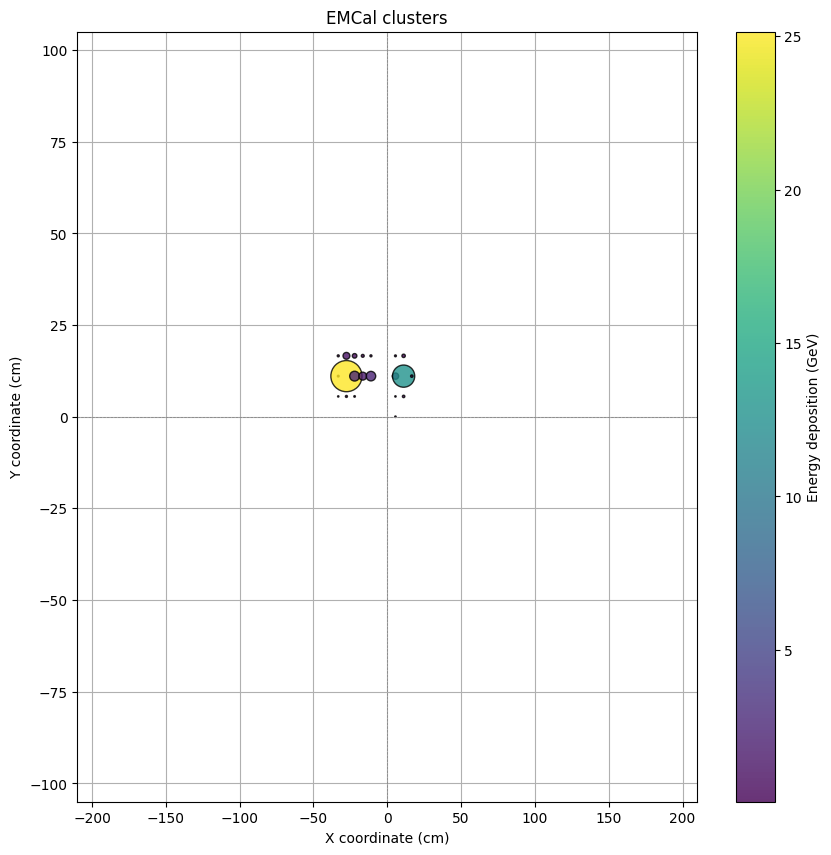

I found the following clusters: [[-38.745  -5.535]]


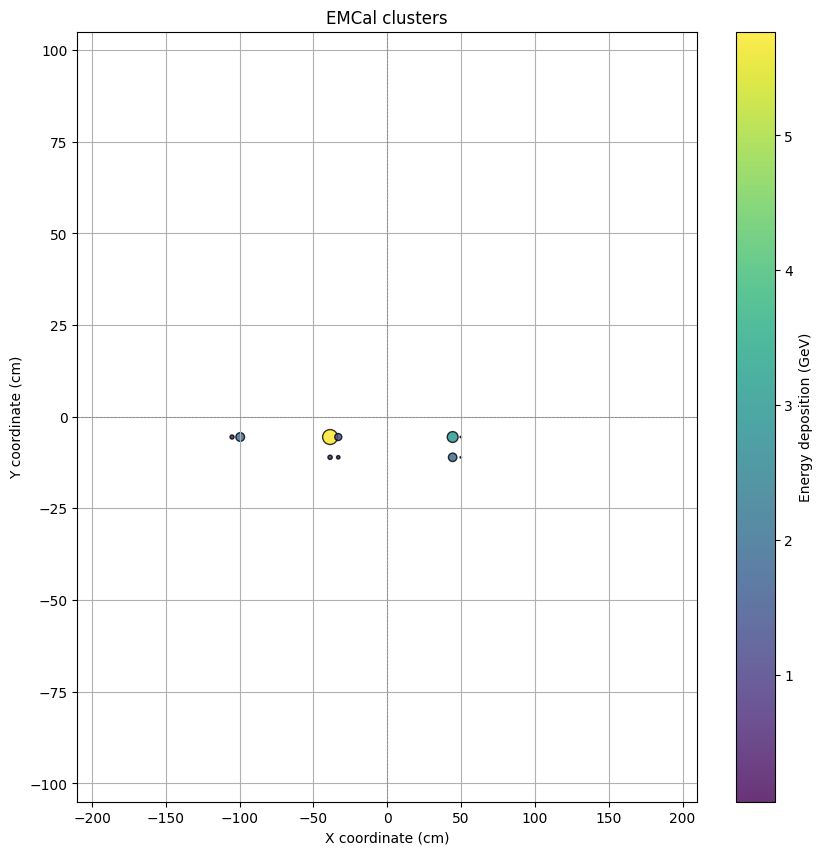

In [73]:
# Check the algorithm on a few events from the dielectron sample

for i in range(2):
    # We prefer to use process_event to read the entry without the need of keyboard inputs
    event   = ex3.process_event('dielectron',i)
    elmID_i = event['elmID']
    edep_i  = event['edep']
    edep_i  = edep_i/ex3.sfc

    # Plot with the conversion into spatial coordinates
    coordinates = channel_to_spatial_coordinates(elmID_i)
    print(f'I found the following clusters: {channel_to_spatial_coordinates(seed_search(elmID_i, edep_i))}')
    plot_spatial_energy_matrix(coordinates, edep_i)

<div class="alert alert-success">

*--> (put your text here)*

Comment your results: